In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import fill

sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.simplefilter('ignore')

In [4]:
# Competition has given 4 datasets:
# Train set (dengue_features_train.csv) which I have named: dengue_train. No number of cases column. 1456x24
# Test set (dengue_features_test.csv) which I have named: dengue_test. No number of cases column. 416x24
# Train set of total_cases between 1990 and 2010 (dengue_labels_train.csv). 1456x4. TARGET.
# Submission example, which needs be as close as the "Train set of total_cases" dataset.

In [5]:
dengue_train = pd.read_csv('./dengue_features_train.csv')

In [6]:
dengue_train.shape

(1456, 24)

In [7]:
dengue_train.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k        ...          \
0  0.177617                 12.42             297.572857        ...           
1  0.155486                 22.82             298.211429        ...           
2  0.170843                 34.54             298.781429        ...           
3  0.235886                 15.36             298.987143        ...           
4  0.247340                  7.52             299.518571        ...           

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8  

[5 rows x 24 columns]

In [8]:
dengue_train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [9]:
dengue_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [10]:
#lots of missing values in 'ndvi_ne'
dengue_train.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [11]:
#some years missing week data and city data. Also noticing some weeks called 53, when only 52 exist in a year.
#https://en.wikipedia.org/wiki/ISO_week_date
year_2010 = dengue_train[dengue_train['year']==2010]
year_2010.weekofyear.sort_values()

1431     1
1432     2
1433     3
1434     4
1435     5
1436     6
1437     7
1438     8
1439     9
1440    10
1441    11
1442    12
1443    13
1444    14
1445    15
1446    16
1447    17
1448    18
1449    19
1450    20
1451    21
1452    22
1453    23
1454    24
1455    25
1430    53
Name: weekofyear, dtype: int64

In [12]:
#5 rows with 53 weeks and missing values. Drop them? 
dengue_train.sort_values('weekofyear', ascending=False).head(6)

city  year  weekofyear week_start_date  ndvi_ne  ndvi_nw   ndvi_se  \
139    sj  1993          53      1993-01-01      NaN      NaN       NaN   
763    sj  2005          53      2005-01-01      NaN      NaN       NaN   
451    sj  1999          53      1999-01-01      NaN      NaN       NaN   
1170   iq  2005          53      2005-01-01      NaN      NaN       NaN   
1430   iq  2010          53      2010-01-01      NaN      NaN       NaN   
243    sj  1995          52      1995-01-01   0.2438    0.045  0.215256   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
139        NaN                   NaN                    NaN   
763        NaN                   NaN                    NaN   
451        NaN                   NaN                    NaN   
1170       NaN                   NaN                    NaN   
1430       NaN                   NaN                    NaN   
243   0.194778                 71.43             298.838571   

            ...          reanalysis_precip_amt_kg_per_m2  \
139         ...                                      NaN   
763         ...                                      NaN   
451         ...                                      NaN   
1170        ...                                      NaN   
1430        ...                                      NaN   
243         ...                                     30.4   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
139                                    NaN                           NaN   
763                                    NaN                           NaN   
451                                    NaN                           NaN   
1170                                   NaN                           NaN   
1430                                   NaN                           NaN   
243                              82.867143                         71.43   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
139                                     NaN                NaN   
763                                     NaN                NaN   
451                                     NaN                NaN   
1170                                    NaN                NaN   
1430                                    NaN                NaN   
243                               17.067143           3.271429   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
139                  NaN                      NaN                 NaN   
763                  NaN                      NaN                 NaN   
451                  NaN                      NaN                 NaN   
1170                 NaN                      NaN                 NaN   
1430                 NaN                      NaN                 NaN   
243            27.314286                 8.742857                32.8   

      station_min_temp_c  station_precip_mm  
139                  NaN                NaN  
763                  NaN                NaN  
451                  NaN                NaN  
1170                 NaN                NaN  
1430                 NaN                NaN  
243                 22.2                9.2  

[6 rows x 24 columns]

In [13]:
dengue_test = pd.read_csv('./dengue_features_test.csv')

In [14]:
dengue_test.shape

(416, 24)

In [106]:
dengue_test.head()

city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  2008          18      2008-04-29  -0.0189 -0.018900  0.102729   
1   sj  2008          19      2008-05-06  -0.0180 -0.012400  0.082043   
2   sj  2008          20      2008-05-13  -0.0015       NaN  0.151083   
3   sj  2008          21      2008-05-20      NaN -0.019867  0.124329   
4   sj  2008          22      2008-05-27   0.0568  0.039833  0.062267   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k        ...          \
0  0.091200                 78.60             298.492857        ...           
1  0.072314                 12.56             298.475714        ...           
2  0.091529                  3.66             299.455714        ...           
3  0.125686                  0.00             299.690000        ...           
4  0.075914                  0.76             299.780000        ...           

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            25.37                             78.781429   
1                            21.83                             78.230000   
2                             4.12                             78.270000   
3                             2.20                             73.015714   
4                             4.36                             74.084286   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         78.60                              15.918571   
1                         12.56                              15.791429   
2                          3.66                              16.674286   
3                          0.00                              15.775714   
4                          0.76                              16.137143   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           3.128571           26.528571                 7.057143   
1           2.571429           26.071429                 5.557143   
2           4.428571           27.928571                 7.785714   
3           4.342857           28.057143                 6.271429   
4           3.542857           27.614286                 7.085714   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                33.3                21.7               75.2  
1                30.0                22.2               34.3  
2                32.8                22.8                3.0  
3                33.3                24.4                0.3  
4                33.3                23.3               84.1  

[5 rows x 24 columns]

In [16]:
dengue_train_cases = pd.read_csv('./dengue_labels_train.csv')

In [17]:
dengue_train_cases.shape

(1456, 4)

In [18]:
dengue_train_cases.head()

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

In [19]:
#Noticed that the test set does not have any total_cases allocated to it. 
#years 2008-2010 have complete data on both locations but has been separated into 2 train/test dataframes. 
#years 2011-2013 only on test set.
dengue_test.year.value_counts().sort_index()

2008     35
2009     52
2010     78
2011    104
2012    104
2013     43
Name: year, dtype: int64

In [22]:
dengue_train.year.value_counts().sort_index()

1990     35
1991     52
1992     52
1993     52
1994     52
1995     52
1996     52
1997     52
1998     52
1999     52
2000     78
2001    104
2002    104
2003    104
2004    104
2005    104
2006    104
2007    104
2008     69
2009     52
2010     26
Name: year, dtype: int64

In [27]:
#San juan data more complete than Iquitos
dengue_train_cases[(dengue_train_cases.city== 'sj')].year.value_counts().sort_index()

1990    35
1991    52
1992    52
1993    52
1994    52
1995    52
1996    52
1997    52
1998    52
1999    52
2000    52
2001    52
2002    52
2003    52
2004    52
2005    52
2006    52
2007    52
2008    17
Name: year, dtype: int64

In [28]:
dengue_train_cases[(dengue_train_cases.city== 'iq')].year.value_counts().sort_index()

2000    26
2001    52
2002    52
2003    52
2004    52
2005    52
2006    52
2007    52
2008    52
2009    52
2010    26
Name: year, dtype: int64

In [29]:
year_2008 = dengue_train[dengue_train['year']==2008]
year_2008.city.value_counts()

iq    52
sj    17
Name: city, dtype: int64

In [30]:
#all data there for target. 
dengue_train_cases.isnull().sum()

city           0
year           0
weekofyear     0
total_cases    0
dtype: int64

In [31]:
dengue_train_cases.city.value_counts()

sj    936
iq    520
Name: city, dtype: int64

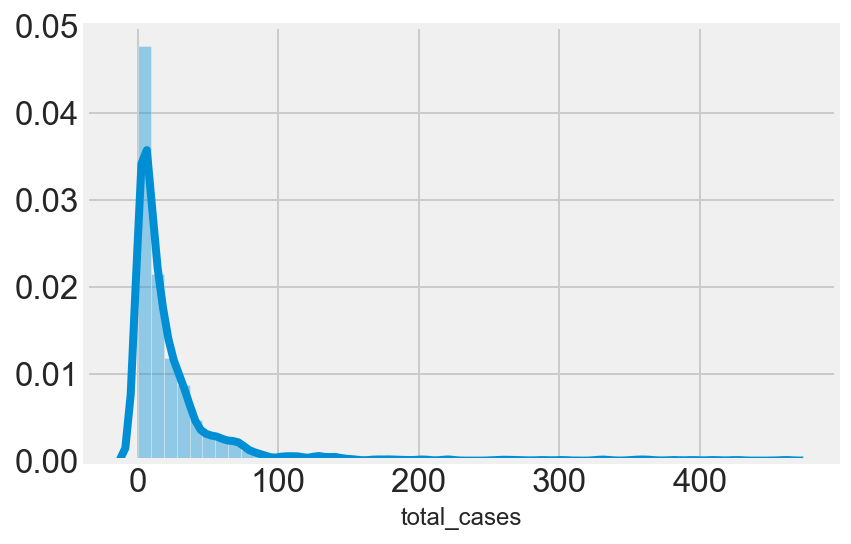

In [32]:
#Vast majority of case numbers are below 100 a week.
sns.distplot(dengue_train_cases.total_cases)

plt.show()

In [121]:
df = dengue_train_cases.set_index(['year', 'weekofyear'])

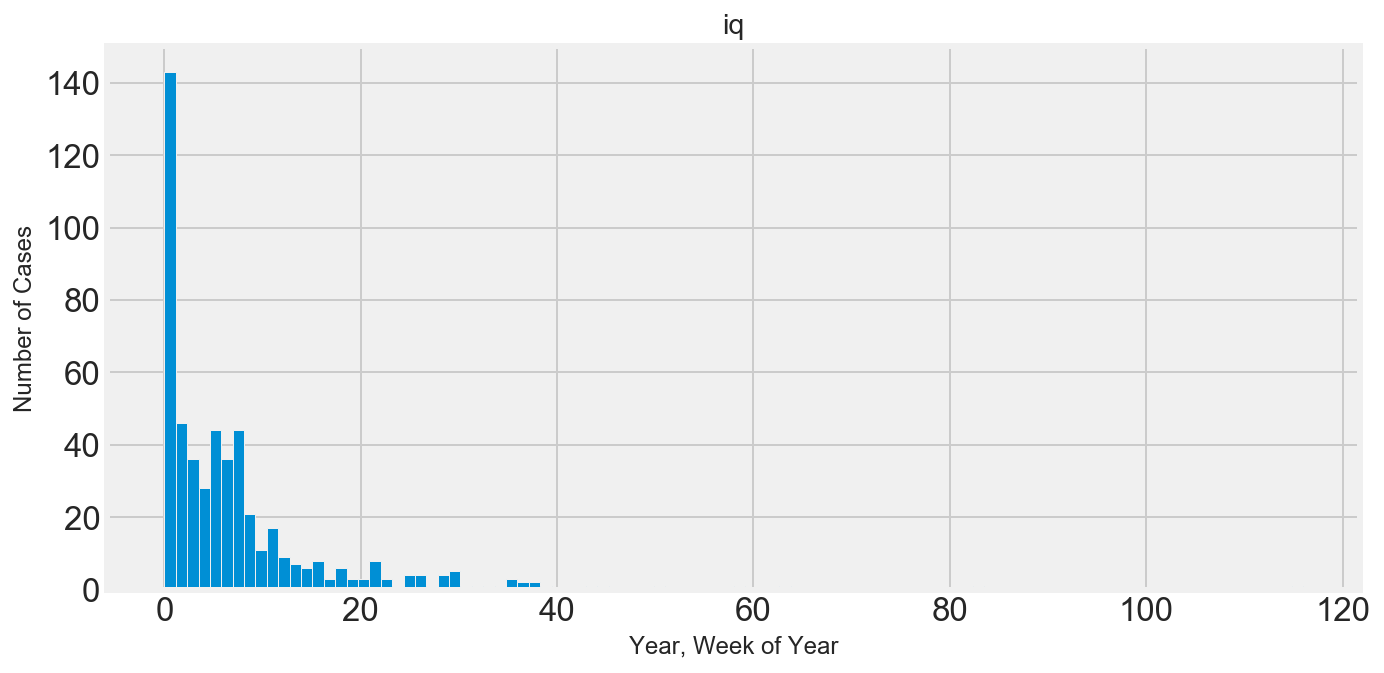

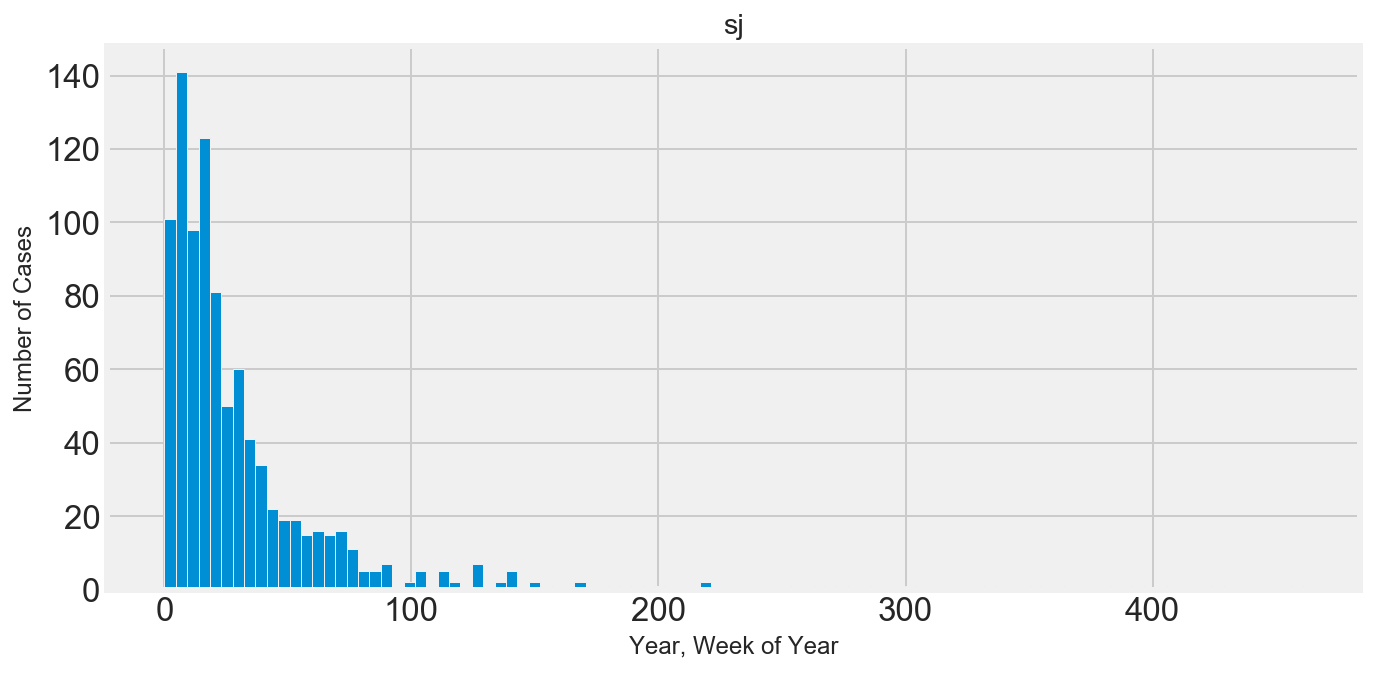

In [122]:
#On a more granular level Iquitos has more weeks of 'total case' at zero. 
for i in ['iq', 'sj']:
    data = df[df['city'] == i]
    data.hist(bins = 100, figsize = (10,5))
    plt.title(str(i))
    plt.xlabel("Year, Week of Year")
    plt.ylabel("Number of Cases")

In [33]:
#baseline of cases/week/town
gb = dengue_train_cases.groupby('city').mean()
gb

year  weekofyear  total_cases
city                                      
iq    2005.000000   26.503846     7.565385
sj    1998.826923   26.503205    34.180556

In [34]:
# Average number of cases is 24.68 for both towns.
dengue_train_cases.total_cases.describe()

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64

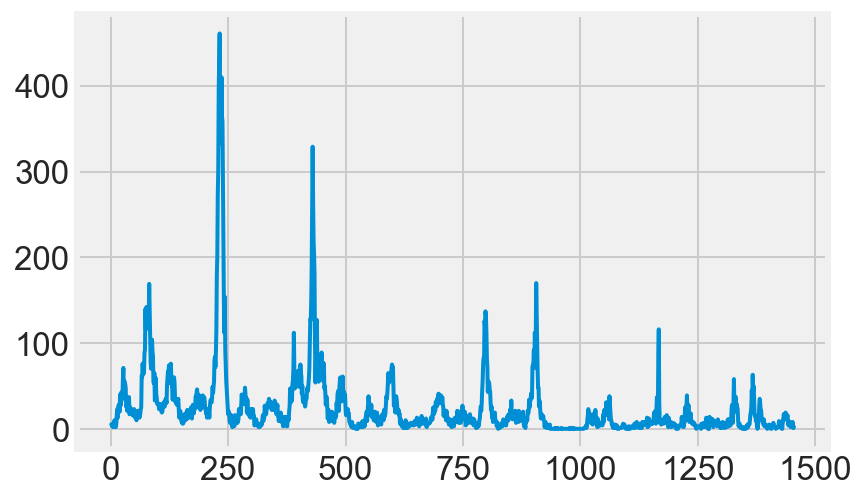

In [123]:
#quick overview of all cases for both cities.
dengue_train_cases.total_cases.plot(lw=2);

In [36]:
#more indepth overview per city and year. 
def yearly_pattern(city, year):
    df = dengue_train_cases[dengue_train_cases['city'] == city][dengue_train_cases['year'] == year]
    df.plot.bar('weekofyear', 'total_cases', legend=False, figsize = (15,5))

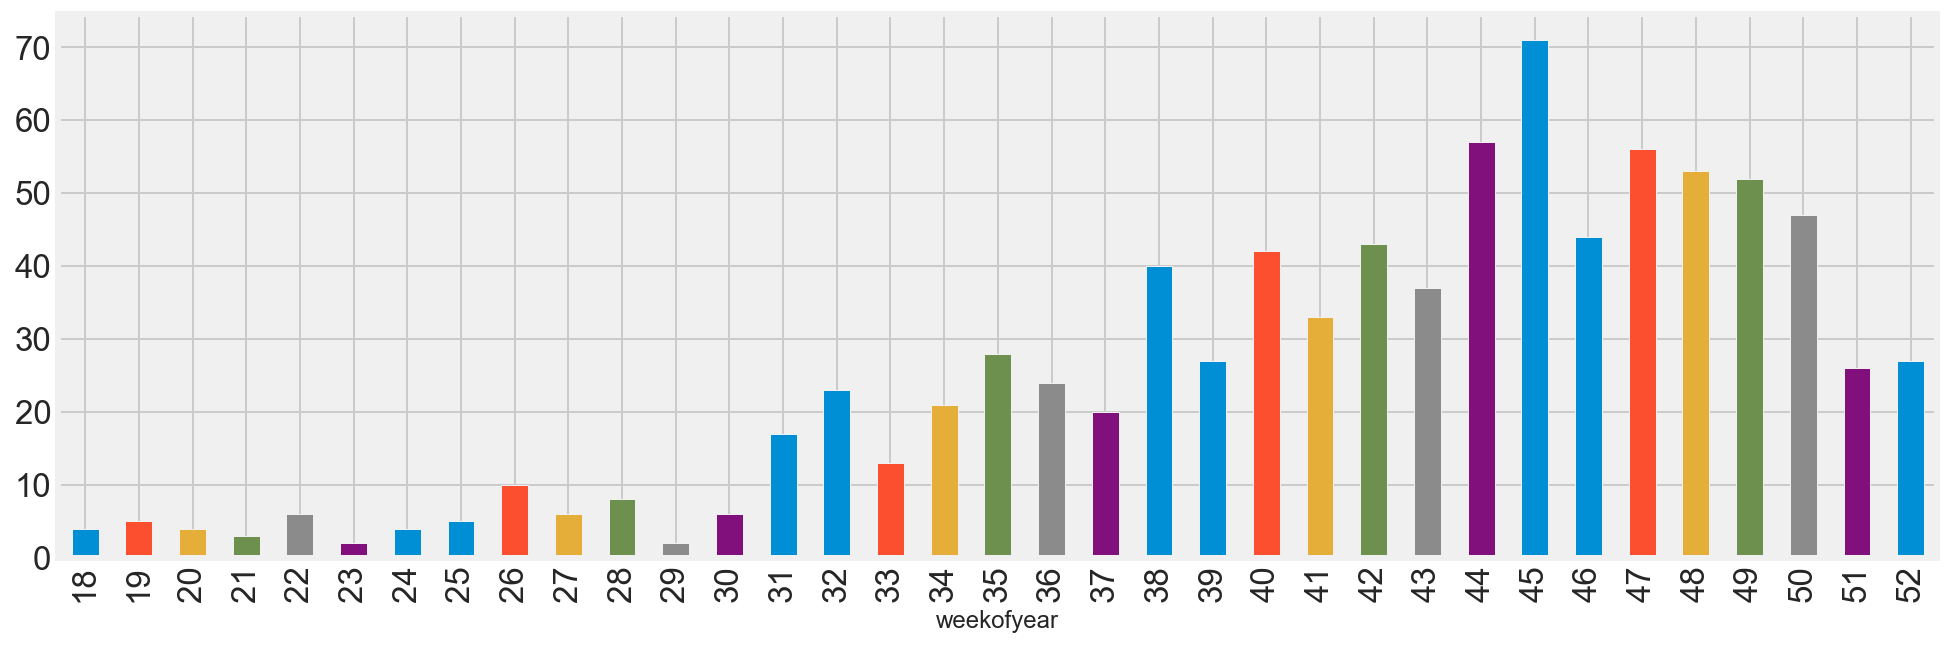

In [37]:
yearly_pattern('sj', 1990)

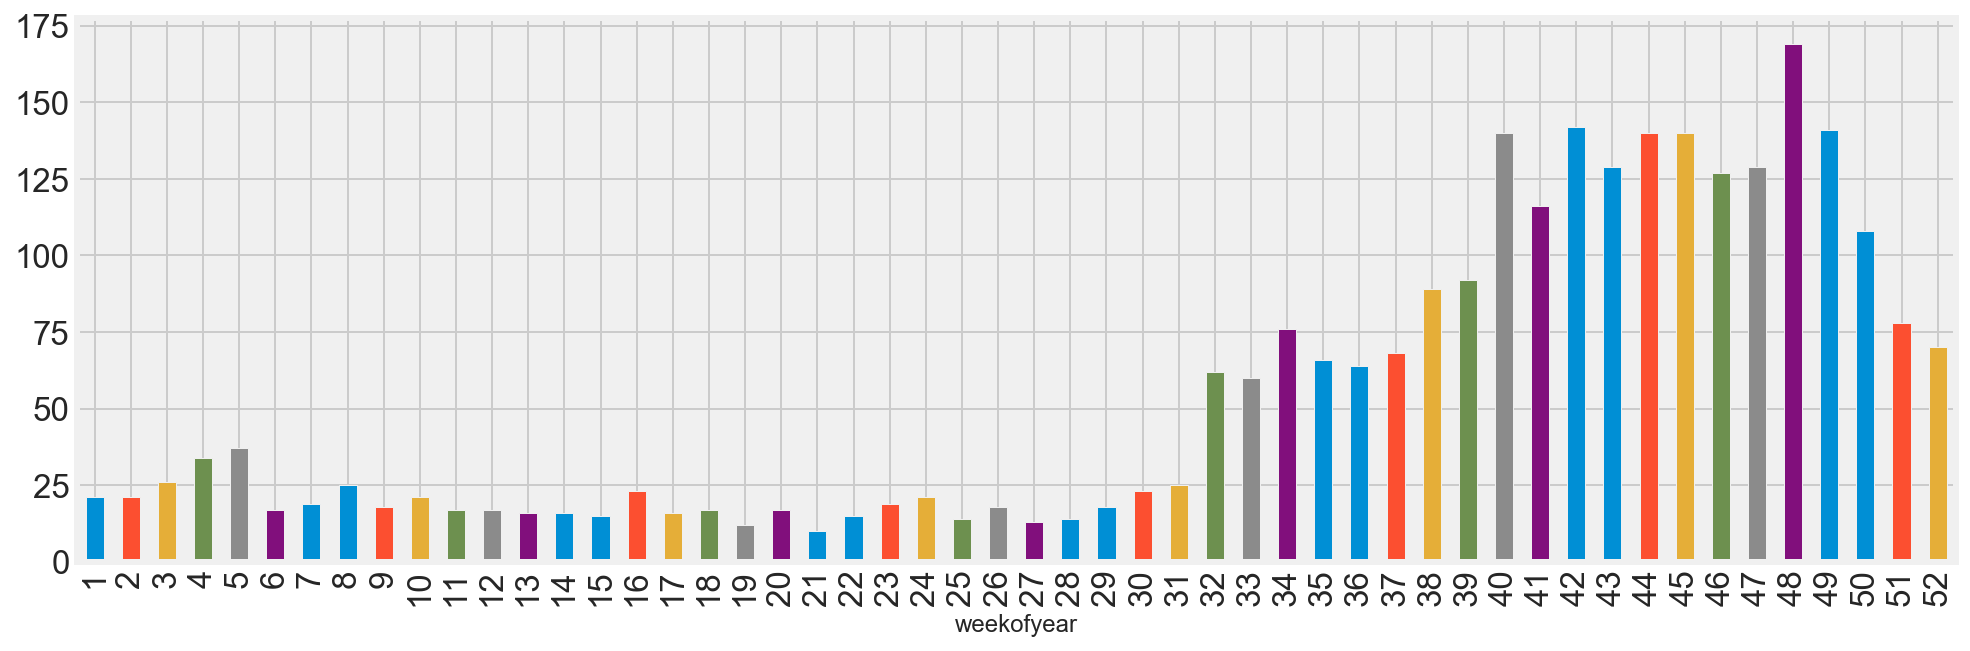

In [38]:
yearly_pattern('sj', 1991)

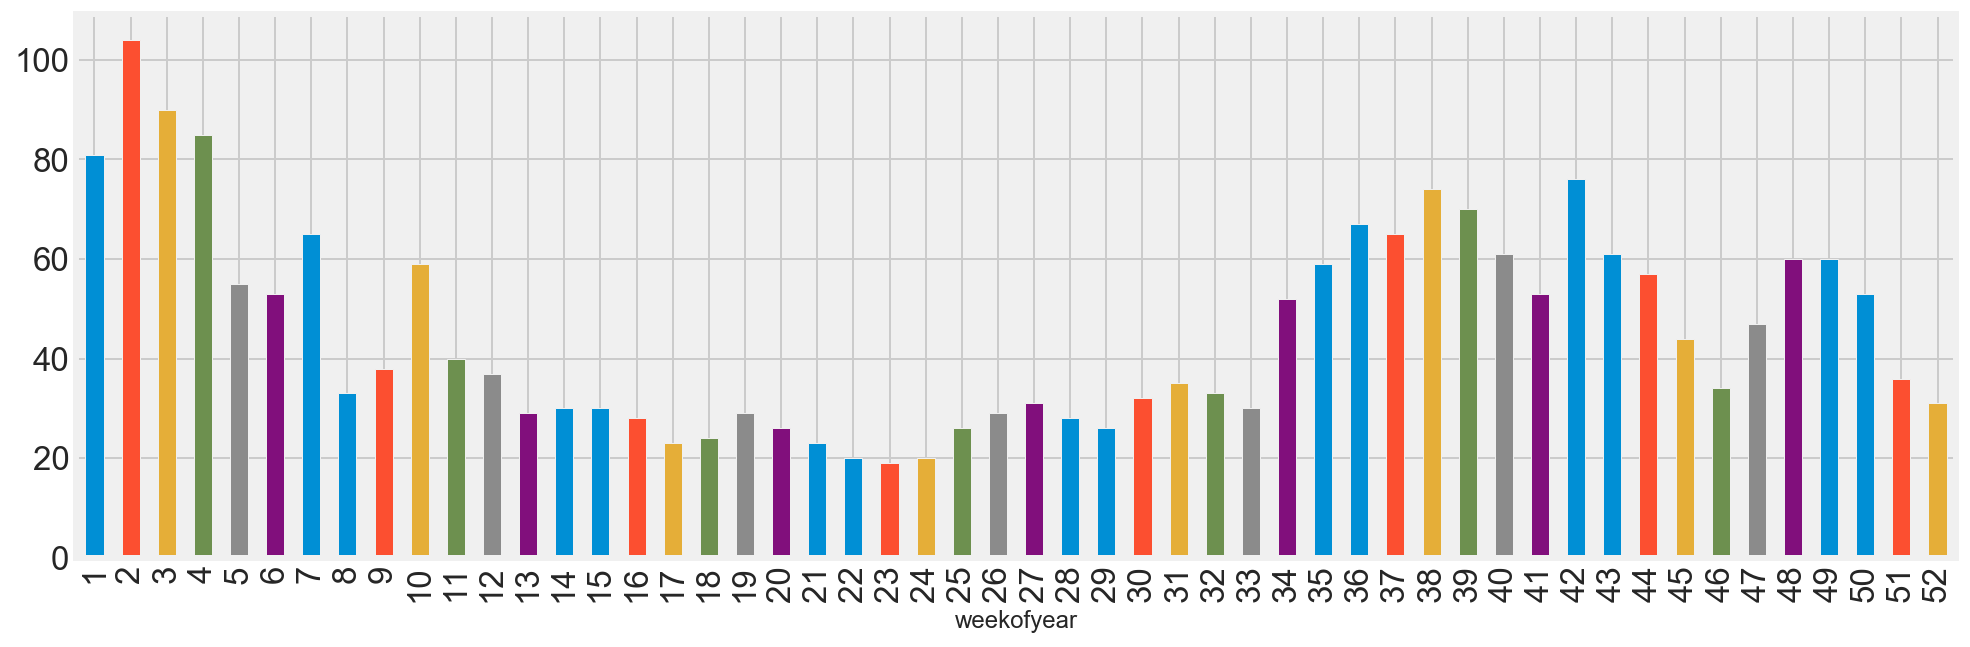

In [39]:
yearly_pattern('sj', 1992)

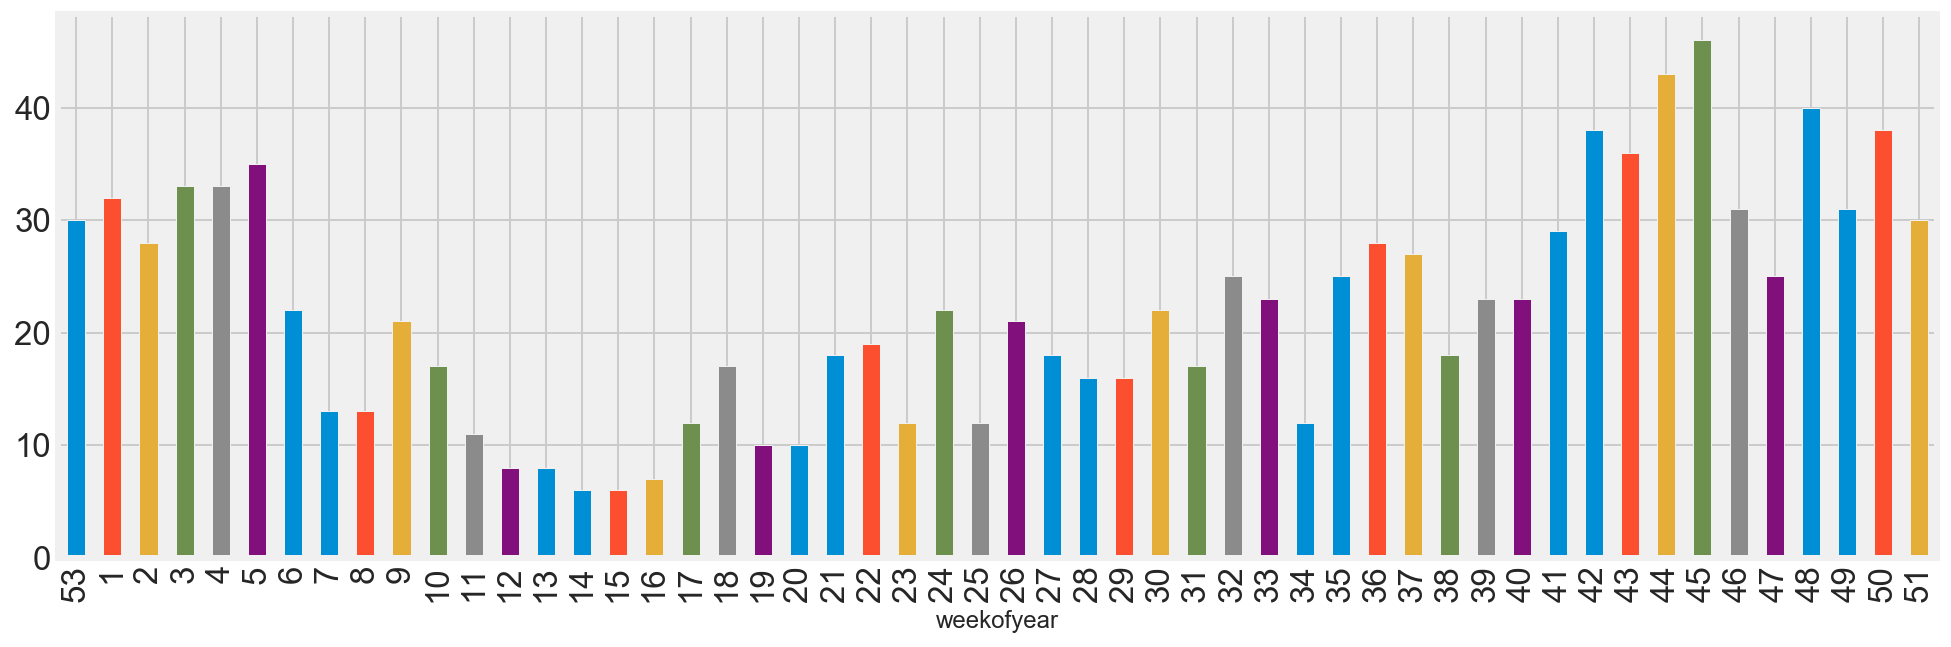

In [40]:
yearly_pattern('sj', 1993)

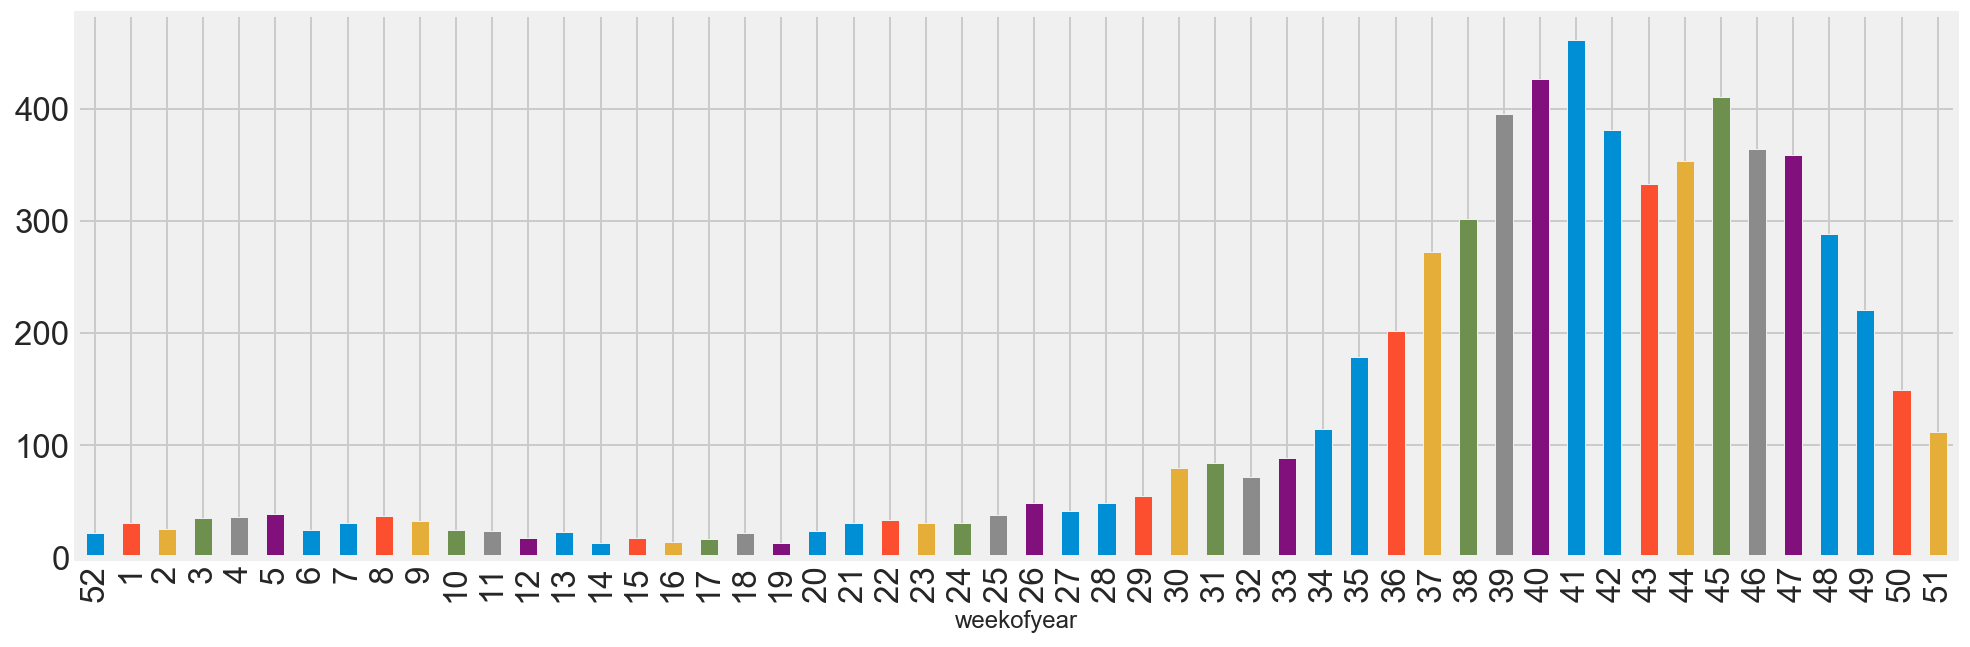

In [41]:
#Biggest outbreak
yearly_pattern('sj', 1994)

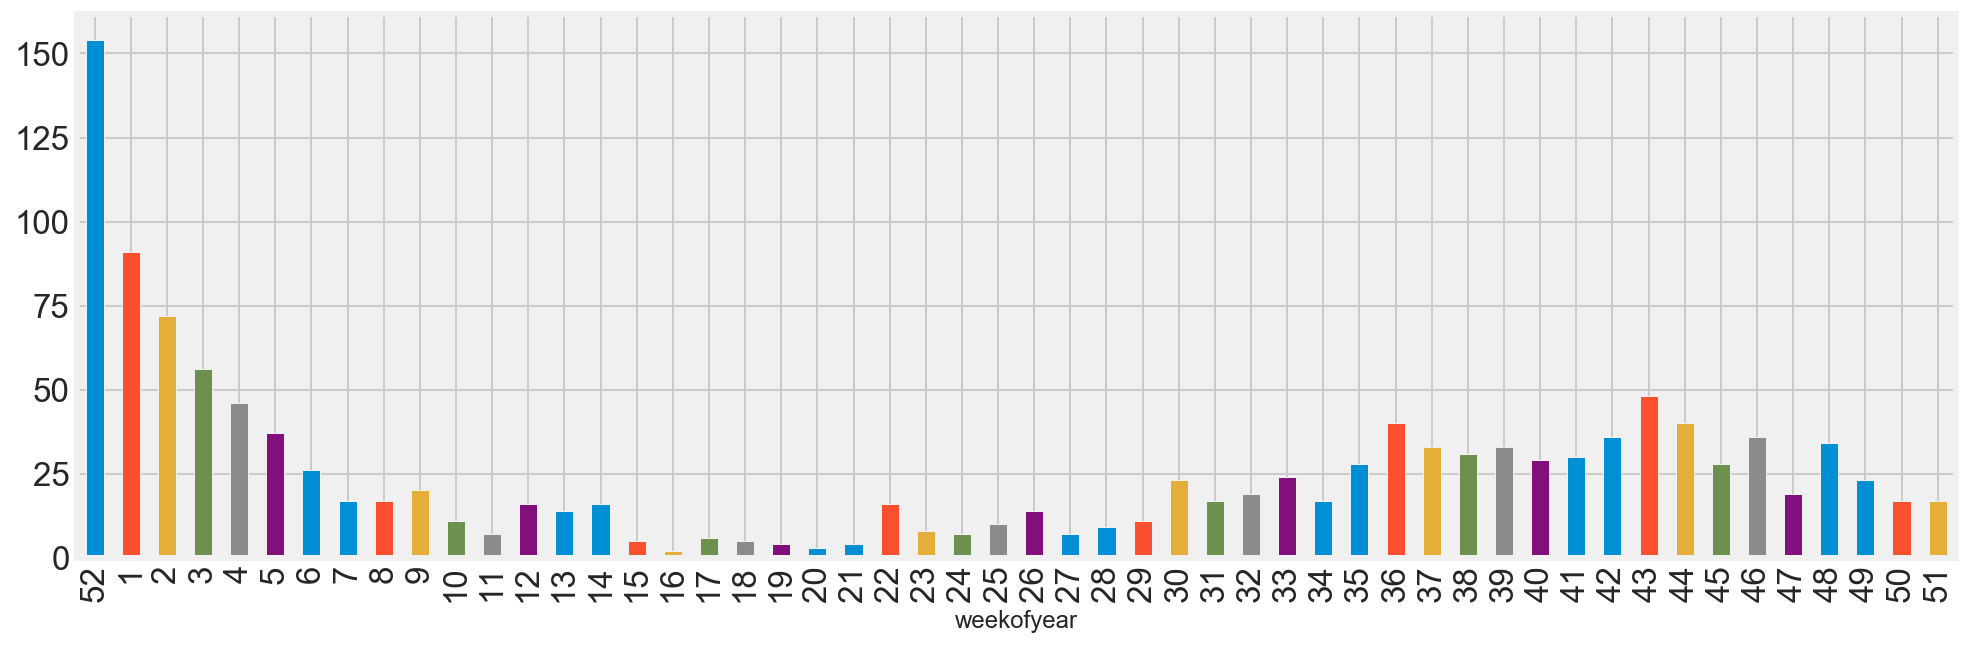

In [42]:
yearly_pattern('sj', 1995)

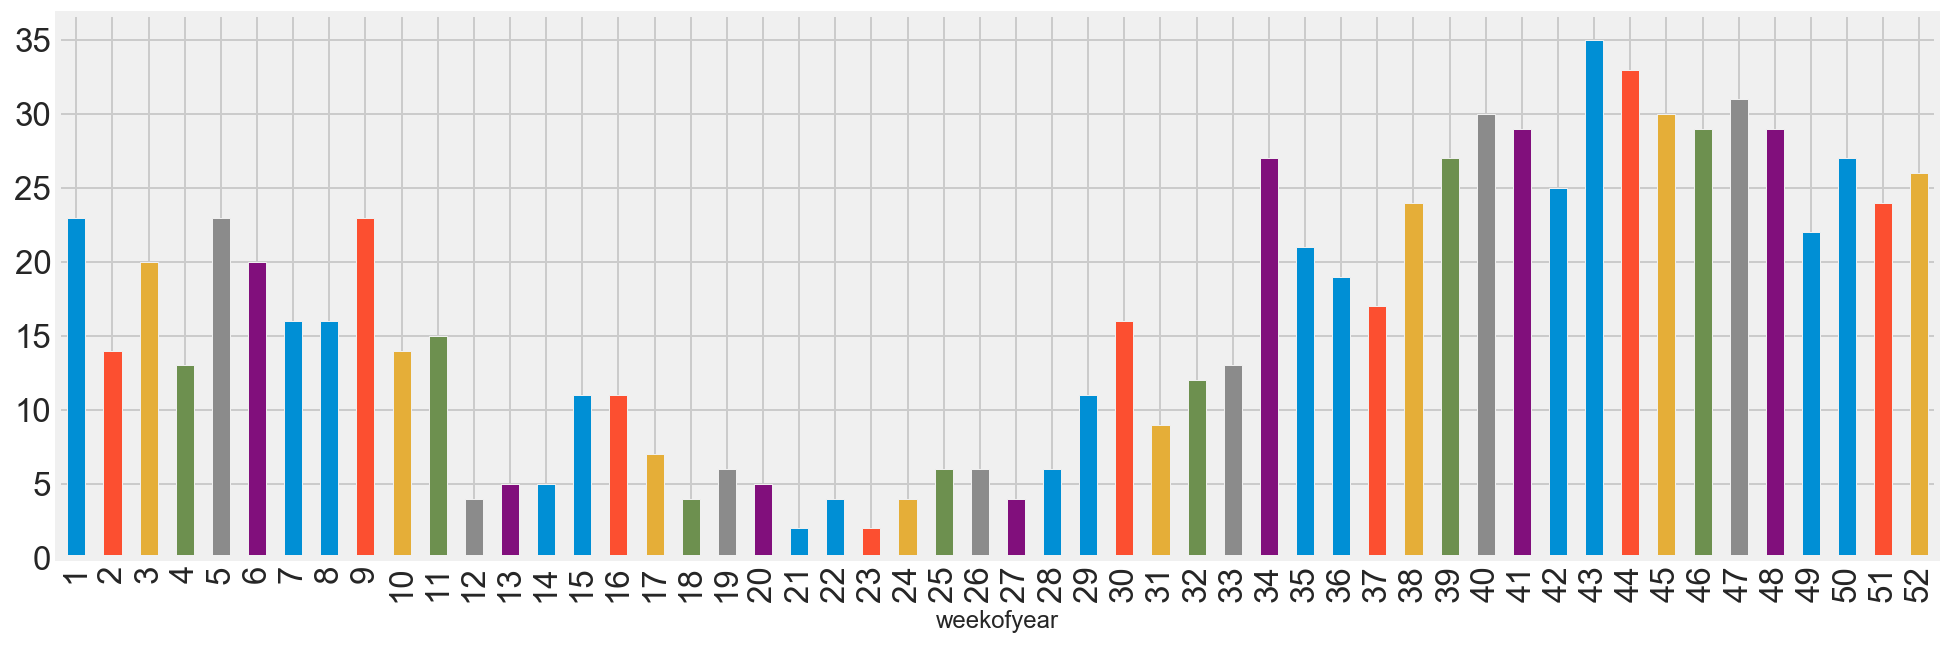

In [43]:
yearly_pattern('sj', 1996)

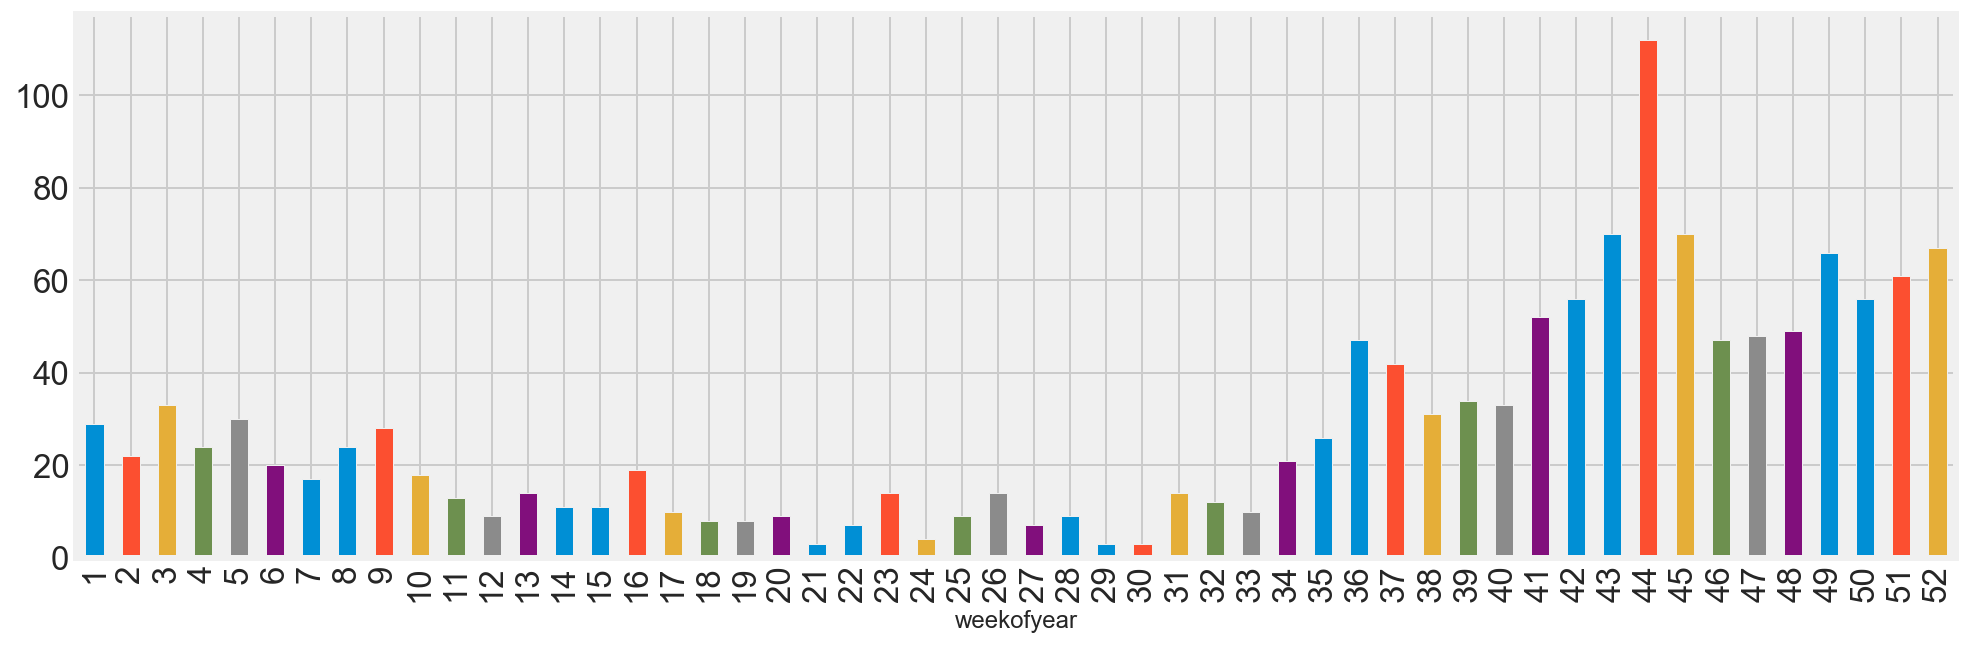

In [44]:
yearly_pattern('sj', 1997)

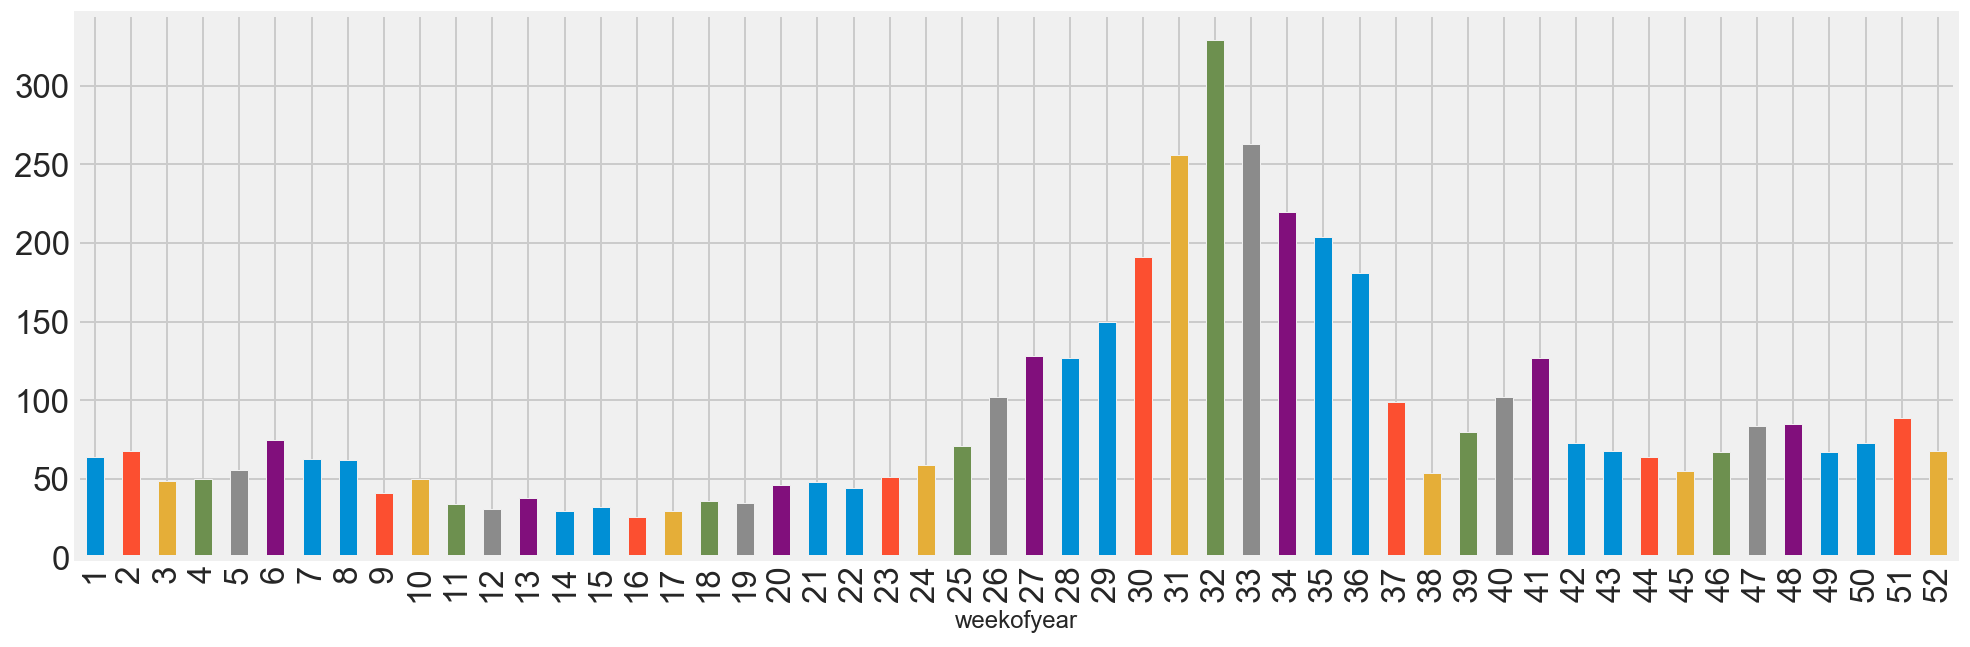

In [45]:
yearly_pattern('sj', 1998)

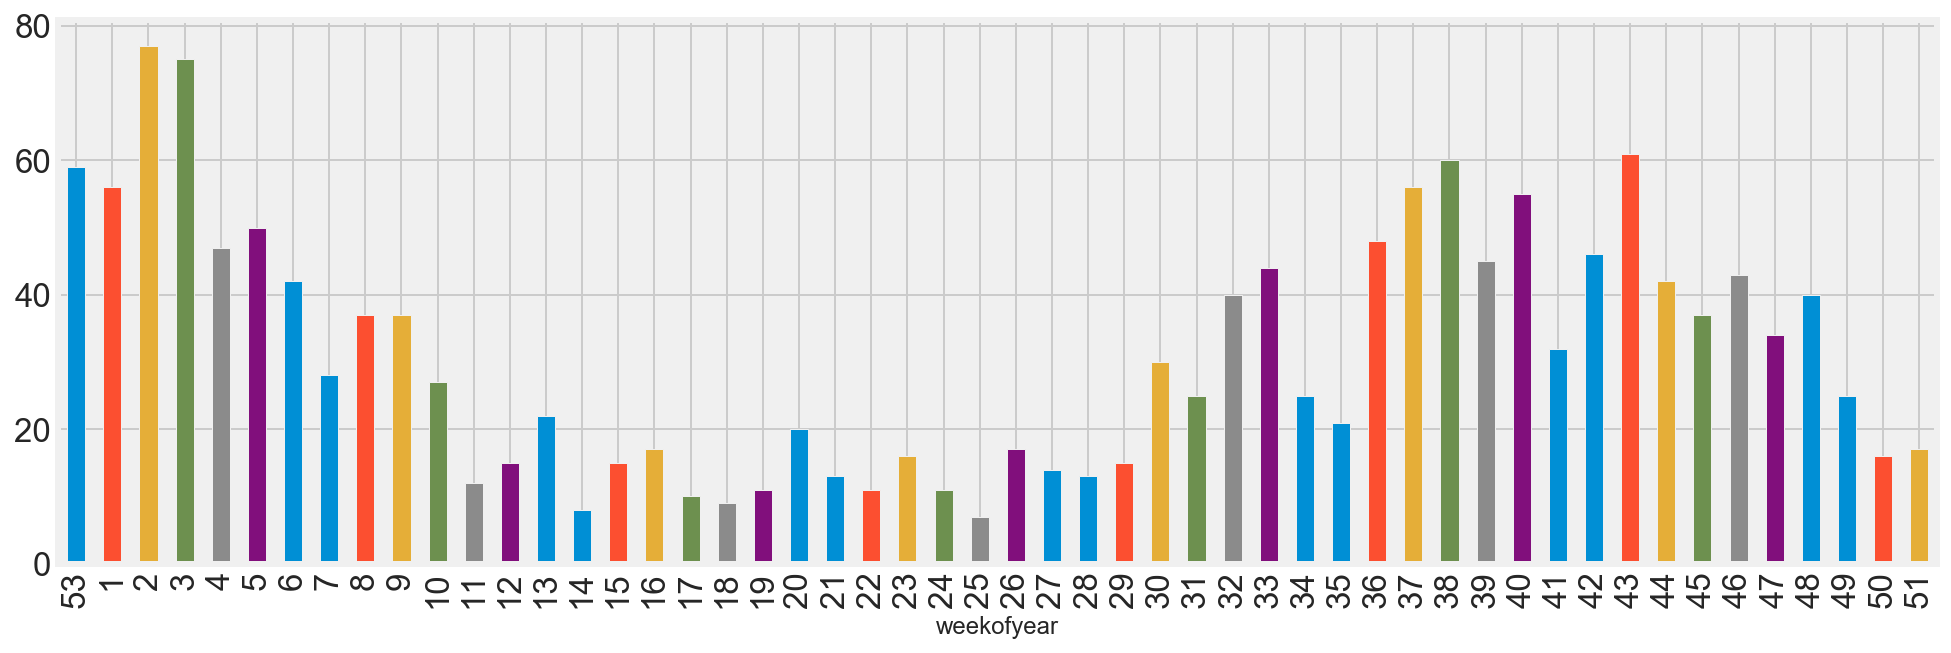

In [46]:
yearly_pattern('sj', 1999)

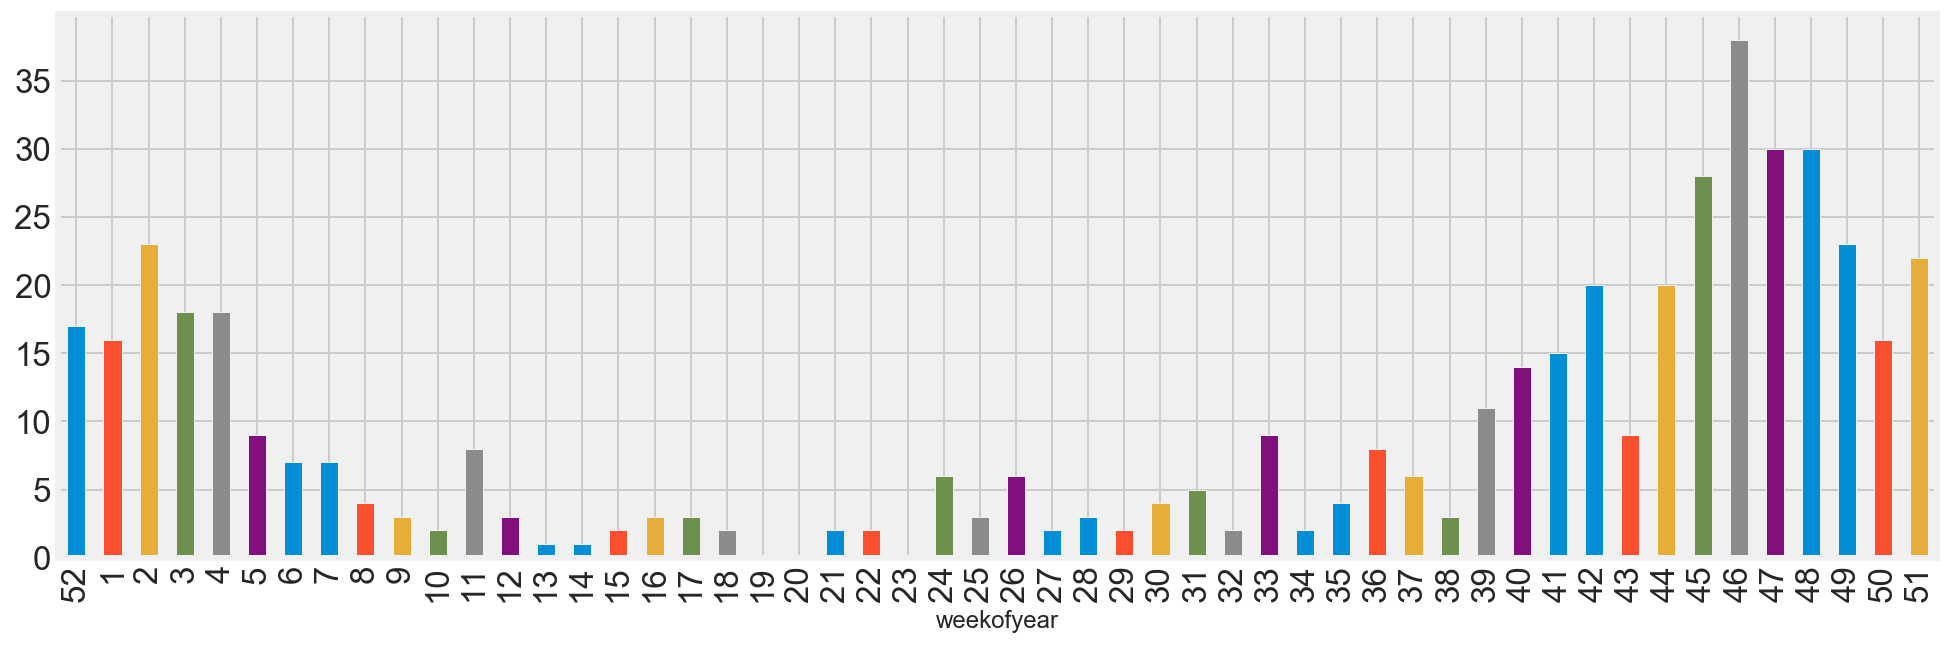

In [47]:
yearly_pattern('sj', 2000)

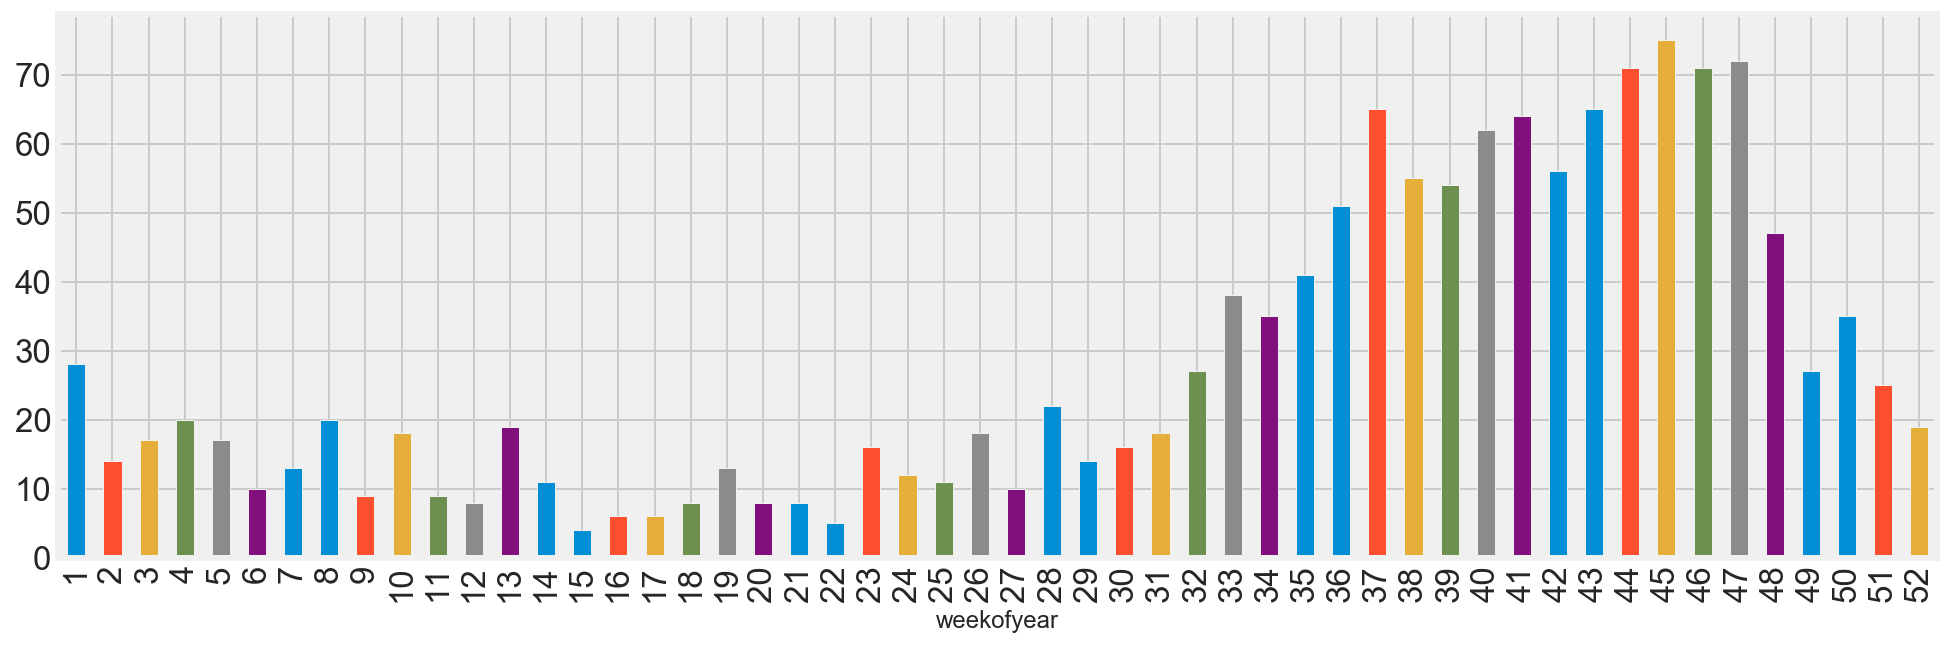

In [48]:
yearly_pattern('sj', 2001)

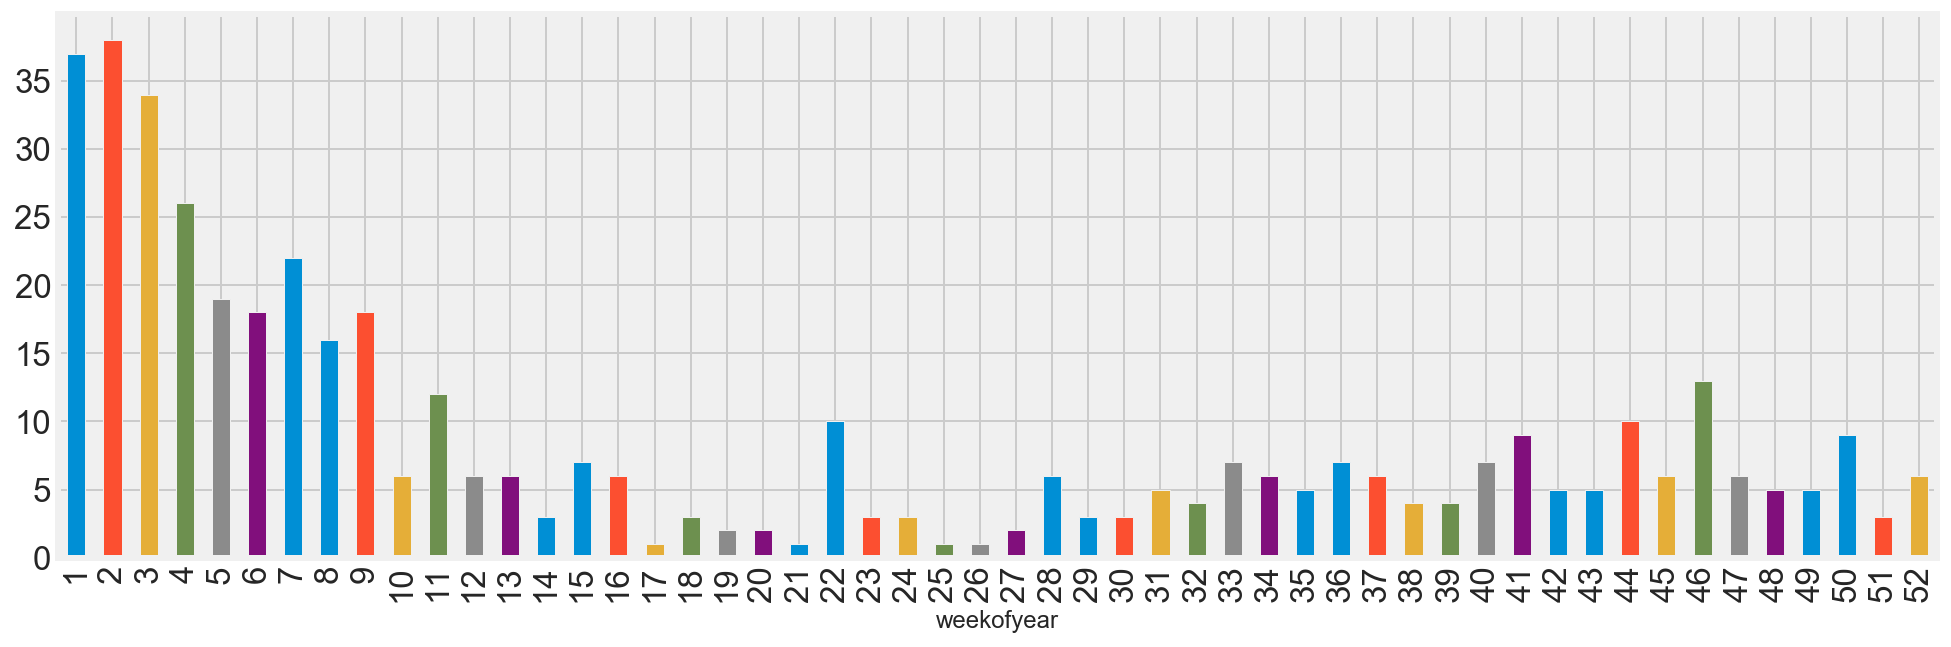

In [49]:
yearly_pattern('sj', 2002)

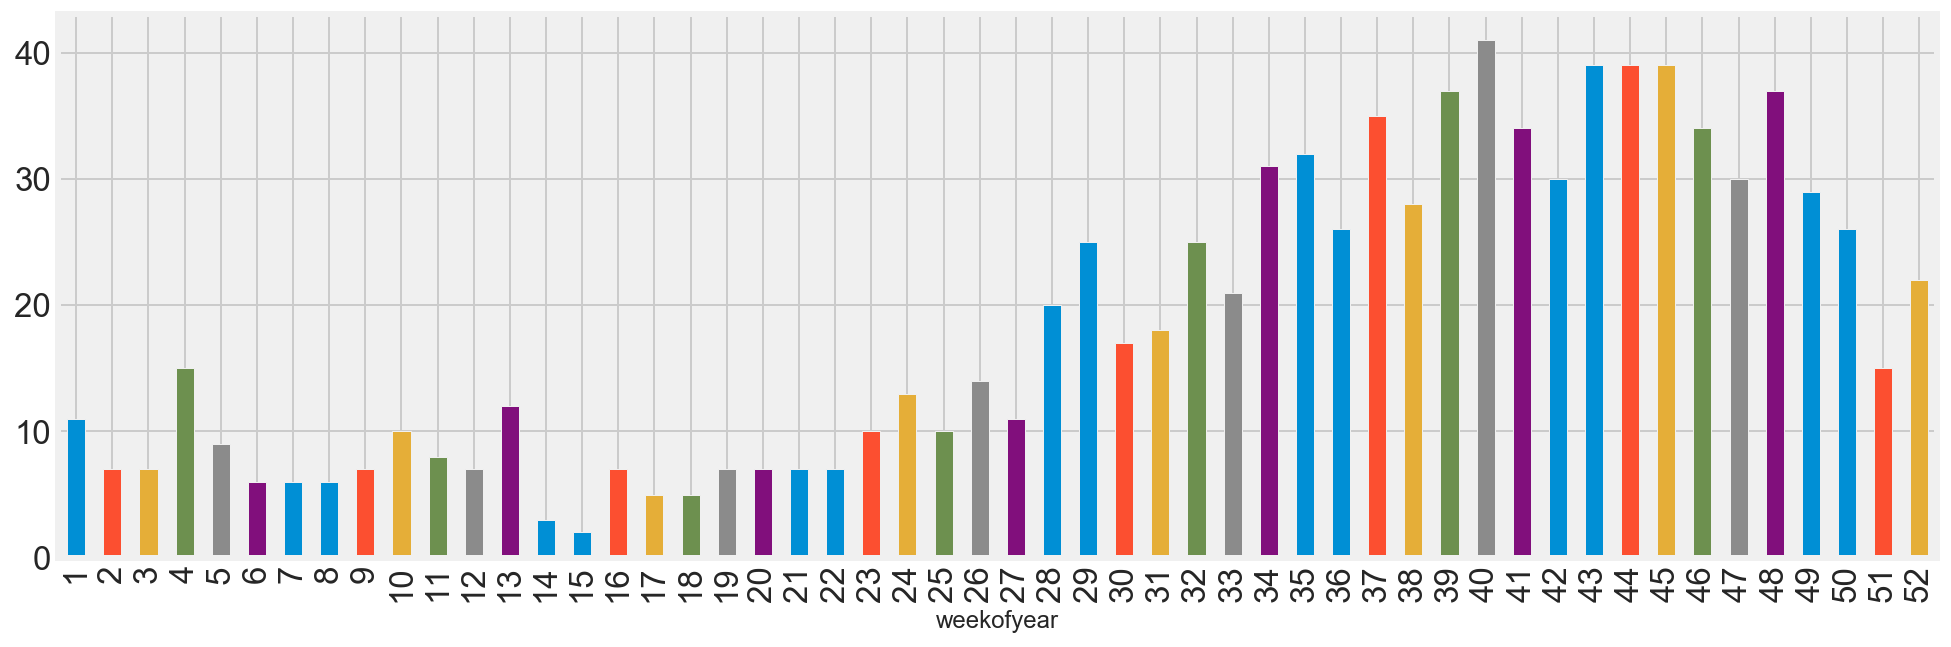

In [50]:
yearly_pattern('sj', 2003)

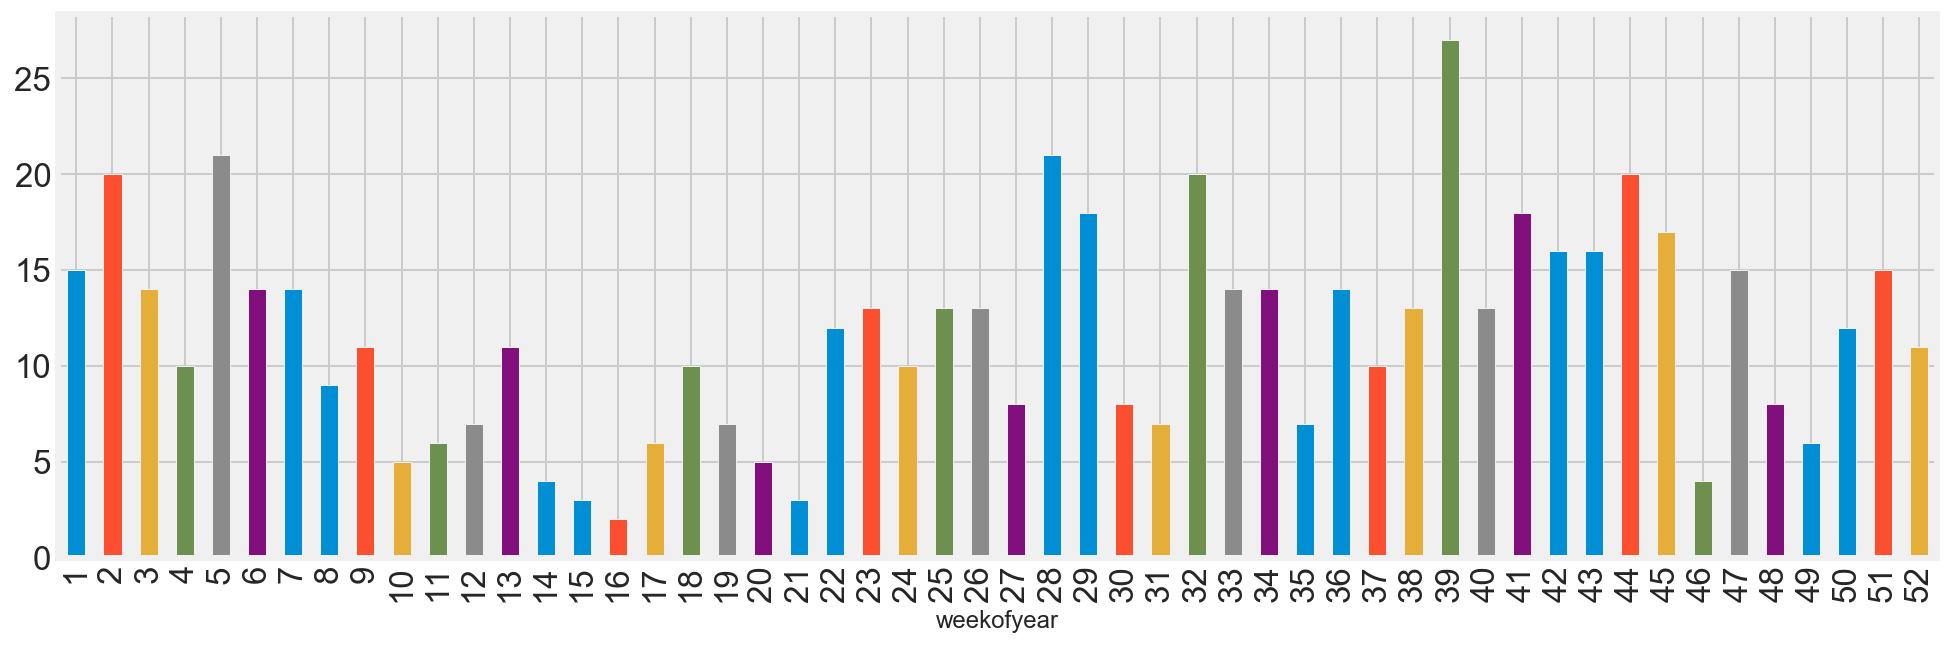

In [51]:
yearly_pattern('sj', 2004)

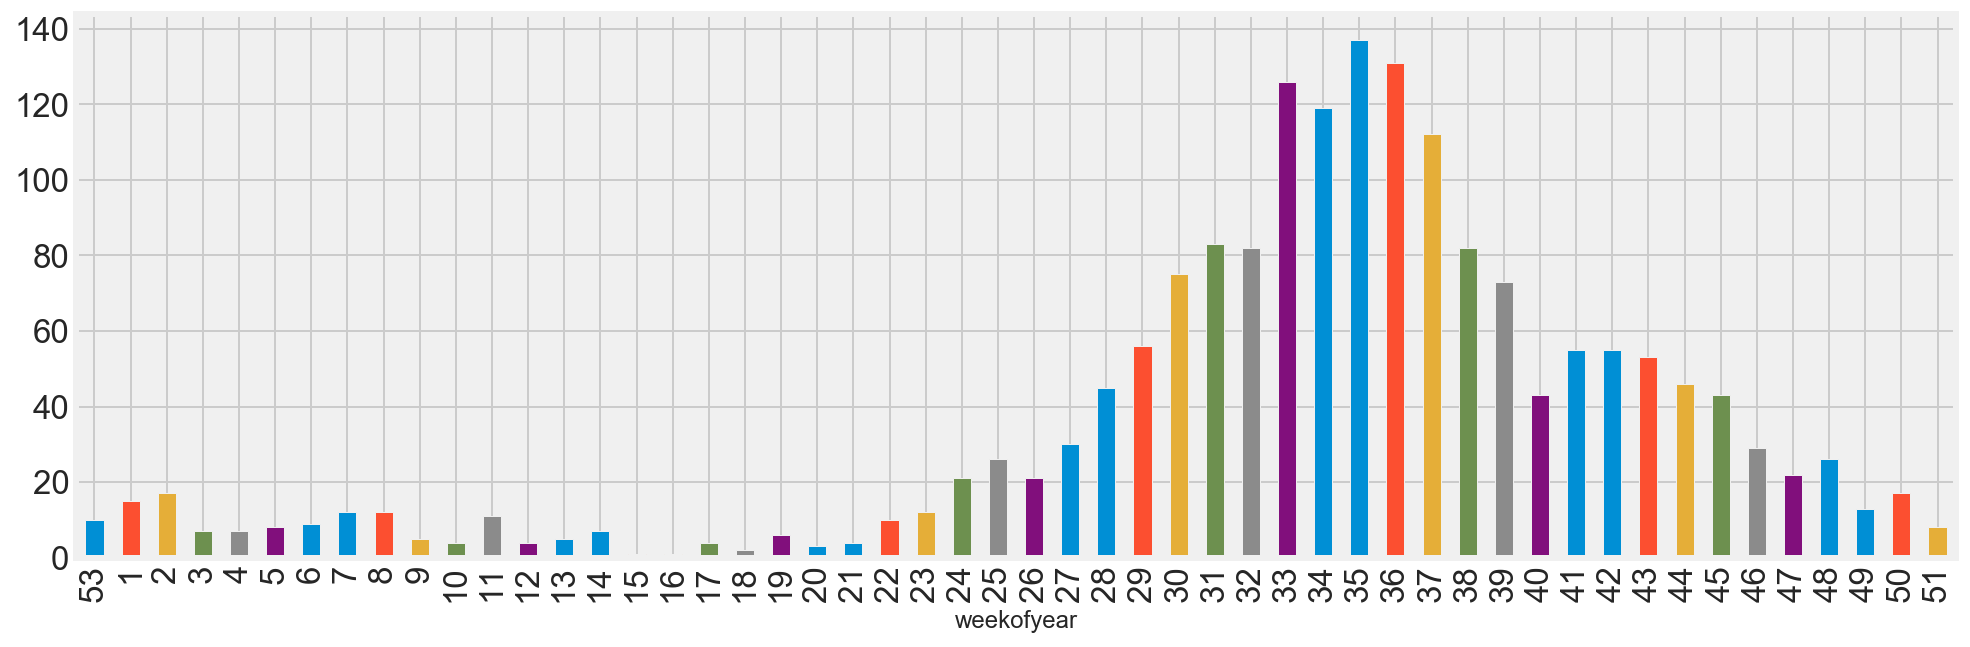

In [52]:
yearly_pattern('sj', 2005)

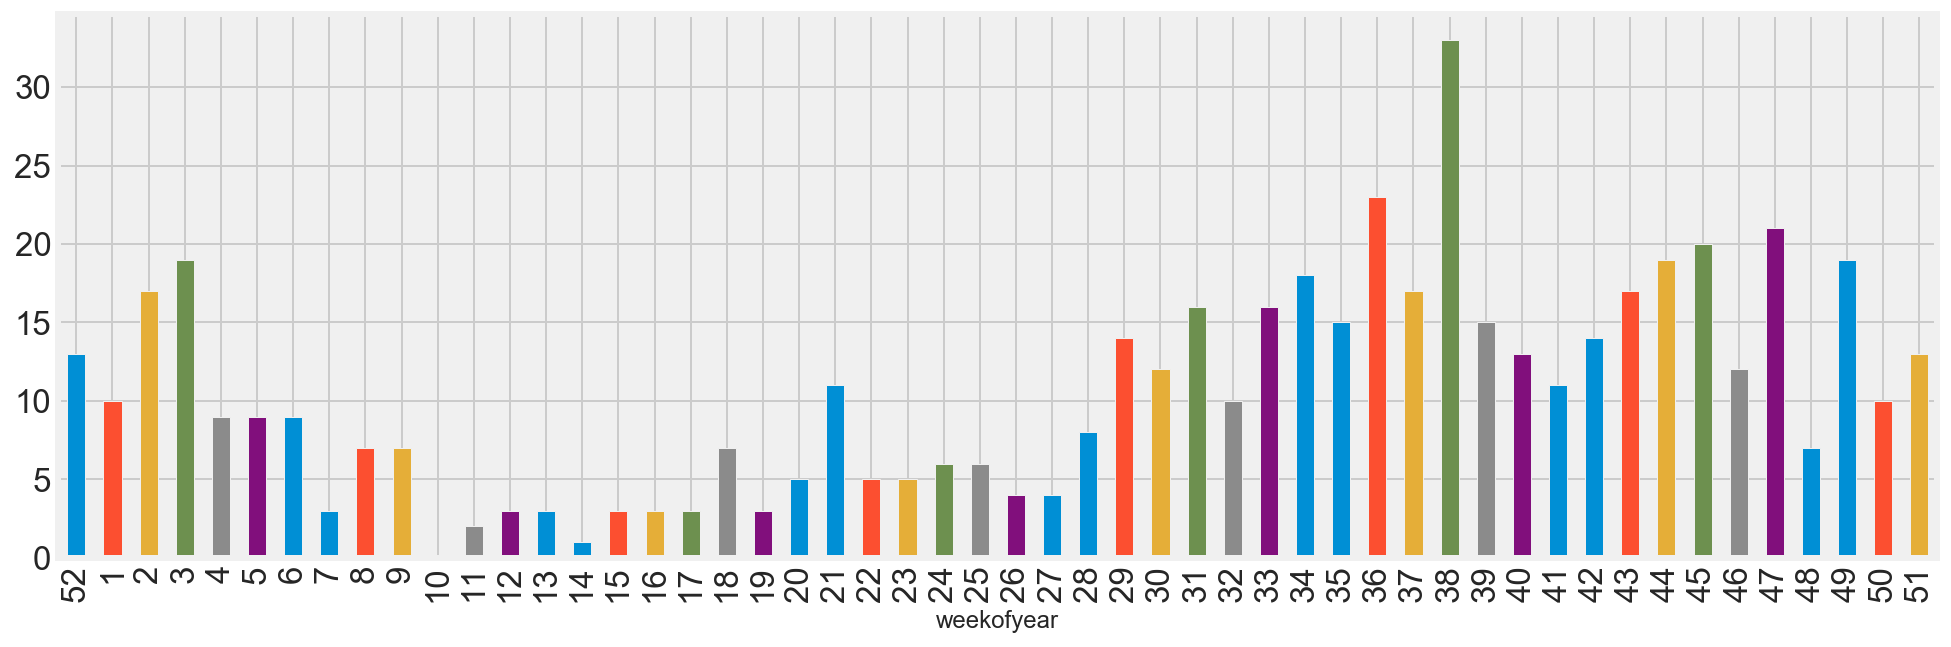

In [53]:
yearly_pattern('sj', 2006)

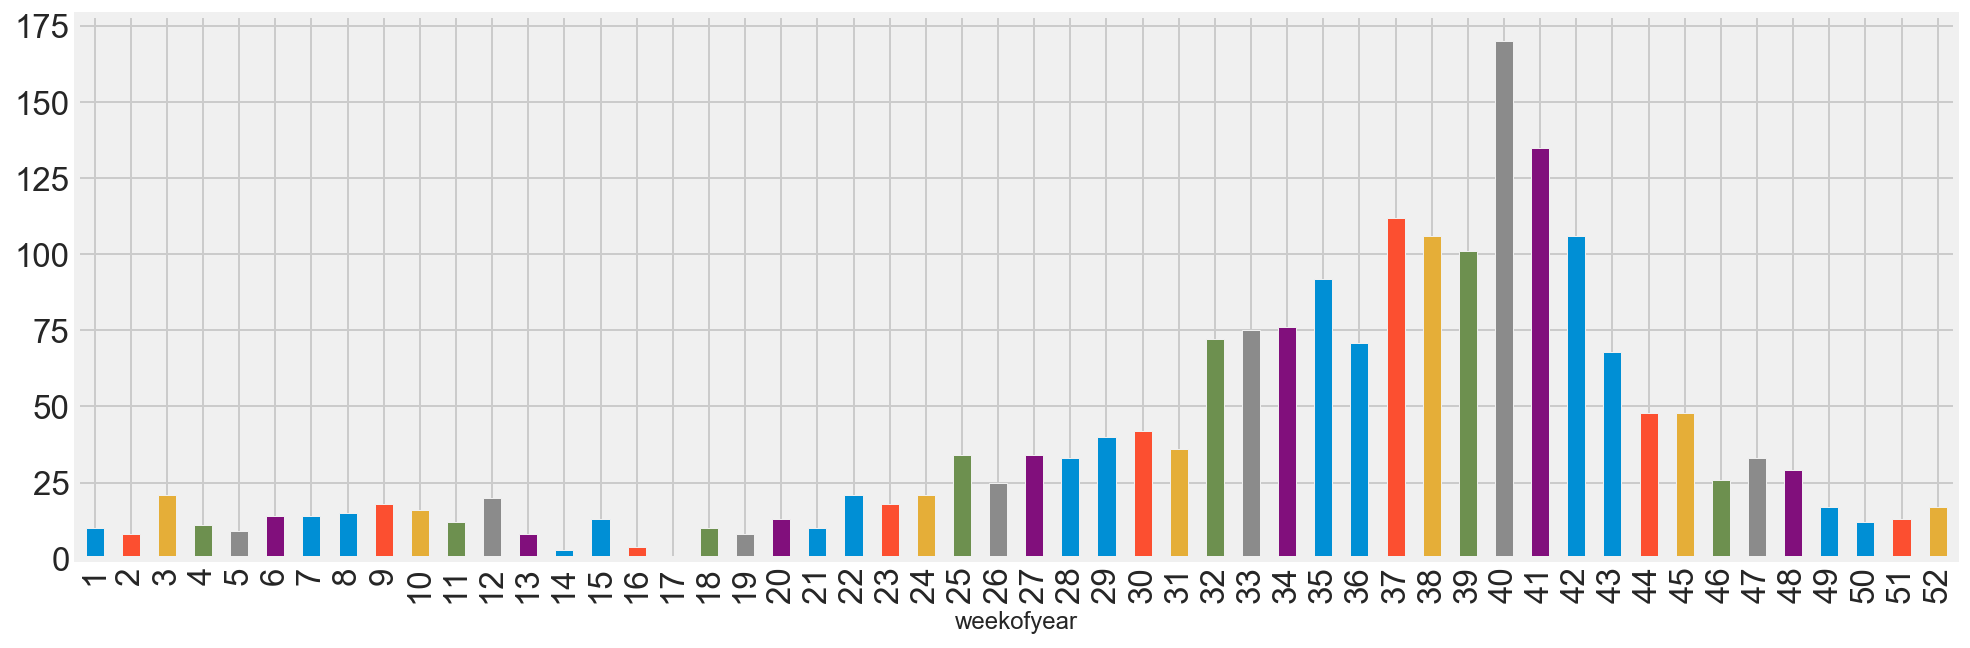

In [54]:
yearly_pattern('sj', 2007)

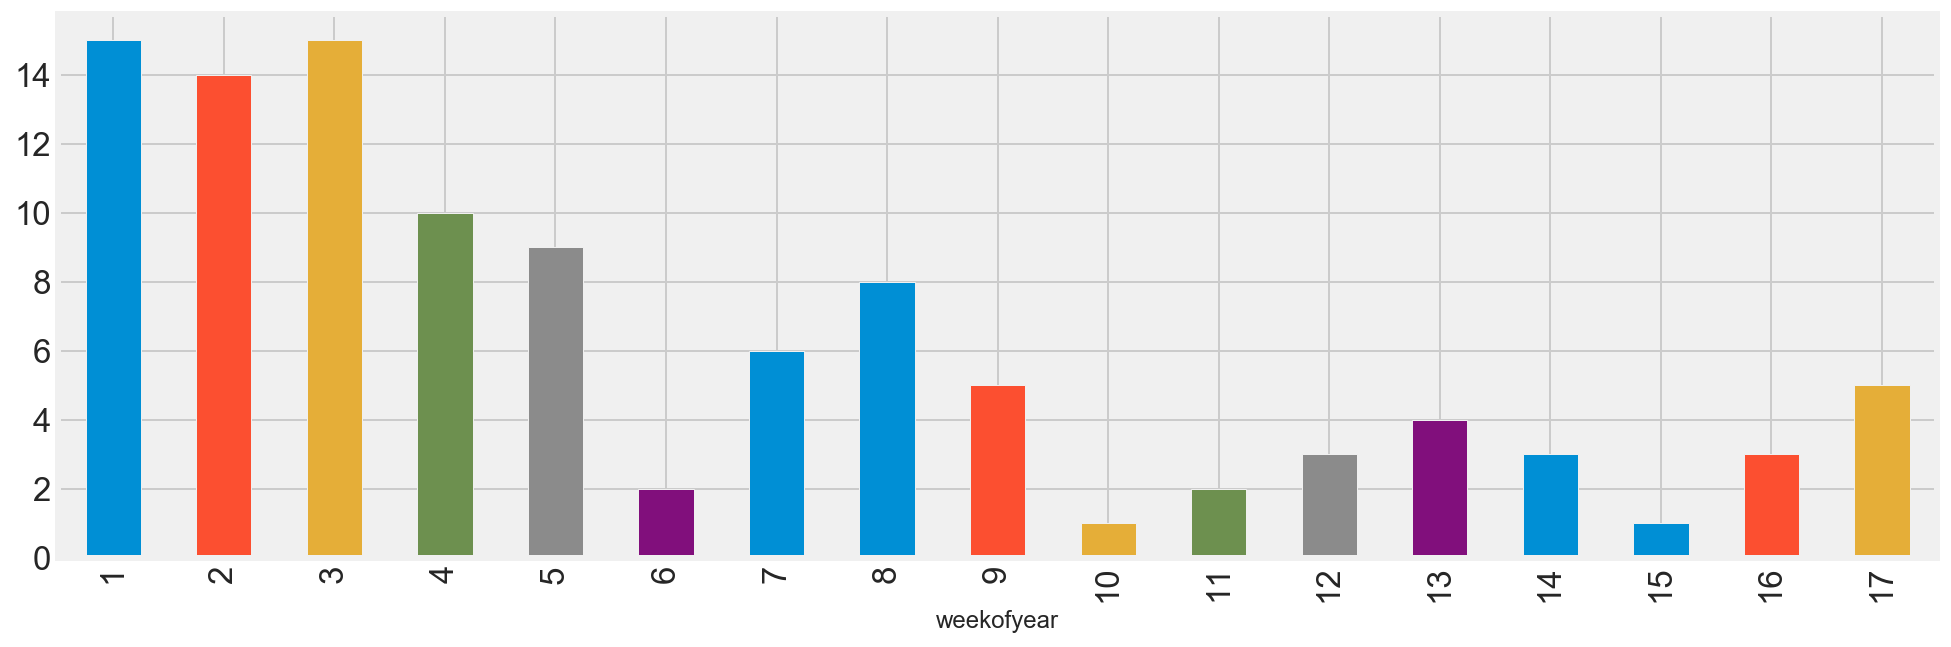

In [55]:
yearly_pattern('sj', 2008)

In [56]:
#both the train set and the train_cases datasets have the same number of rows 
#and number of of weeks. Will merge the datasets so that dengue_train includes the columns
#total_cases from dengue_train_cases.
dengue_train_cases.year.value_counts().sort_index()

1990     35
1991     52
1992     52
1993     52
1994     52
1995     52
1996     52
1997     52
1998     52
1999     52
2000     78
2001    104
2002    104
2003    104
2004    104
2005    104
2006    104
2007    104
2008     69
2009     52
2010     26
Name: year, dtype: int64

In [58]:
#create a new dataset with by adding the total_cases column to Dengue_train dataset. 
dengue_merged= pd.merge(dengue_train_cases, dengue_train, on=['city', 'year', 'weekofyear'])

In [59]:
#same length of rows and extra column. 
dengue_merged.shape

(1456, 25)

In [60]:
dengue_merged['week_start_date']=pd.to_datetime(dengue_merged['week_start_date'])

In [61]:
san_juan = dengue_merged[dengue_merged['city'] == 'sj']

In [63]:
san_juan.head()

city  year  weekofyear  total_cases week_start_date   ndvi_ne   ndvi_nw  \
0   sj  1990          18            4      1990-04-30  0.122600  0.103725   
1   sj  1990          19            5      1990-05-07  0.169900  0.142175   
2   sj  1990          20            4      1990-05-14  0.032250  0.172967   
3   sj  1990          21            3      1990-05-21  0.128633  0.245067   
4   sj  1990          22            6      1990-05-28  0.196200  0.262200   

    ndvi_se   ndvi_sw  precipitation_amt_mm        ...          \
0  0.198483  0.177617                 12.42        ...           
1  0.162357  0.155486                 22.82        ...           
2  0.157200  0.170843                 34.54        ...           
3  0.227557  0.235886                 15.36        ...           
4  0.251200  0.247340                  7.52        ...           

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8  

[5 rows x 25 columns]

In [76]:
sjtdtr_k_mean = san_juan.groupby('weekofyear').reanalysis_tdtr_k.mean()

Text(0,0.5,'Min_temp_k_mean')

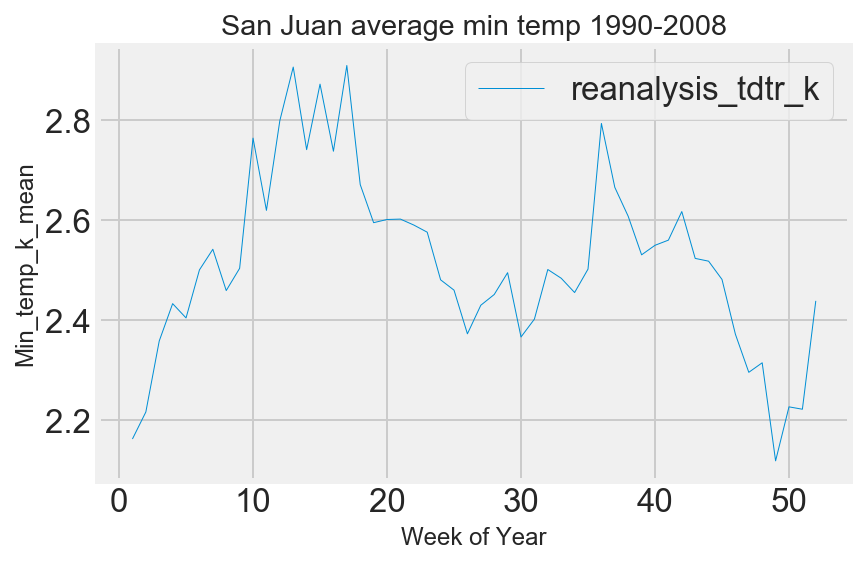

In [77]:
sjtdtr_k_mean.plot(lw=0.5);
plt.legend();
plt.title('San Juan average min temp 1990-2008');
plt.xlabel('Week of Year')
plt.ylabel('Min_temp_k_mean')

In [90]:
sjhum_kg_mean = san_juan.groupby('weekofyear').reanalysis_specific_humidity_g_per_kg.mean()

Text(0,0.5,'Humidity kg mean')

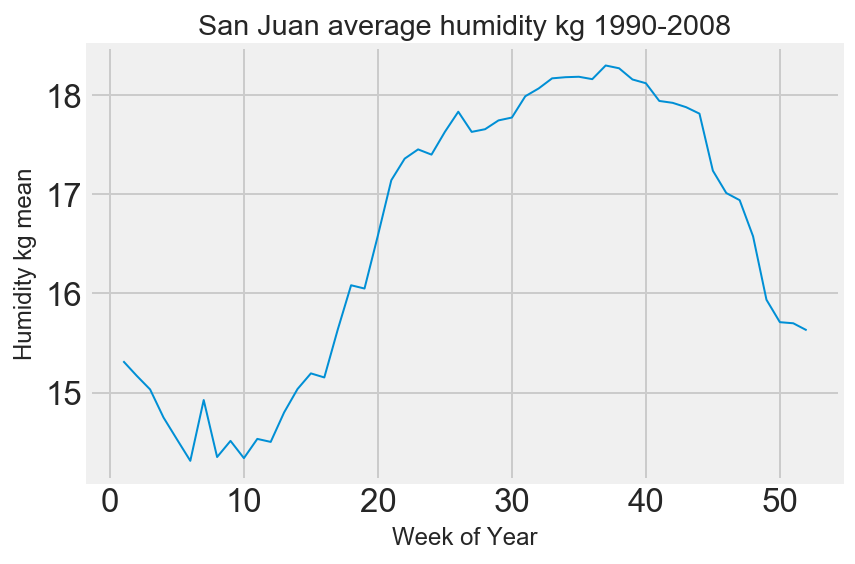

In [91]:
sjhum_kg_mean.plot(lw=1);
#plt.legend();
plt.title('San Juan average humidity kg 1990-2008');
plt.xlabel('Week of Year')
plt.ylabel('Humidity kg mean')

In [82]:
sjhum_perc_mean = san_juan.groupby('weekofyear').reanalysis_relative_humidity_percent.mean()

Text(0,0.5,'Humidity % mean')

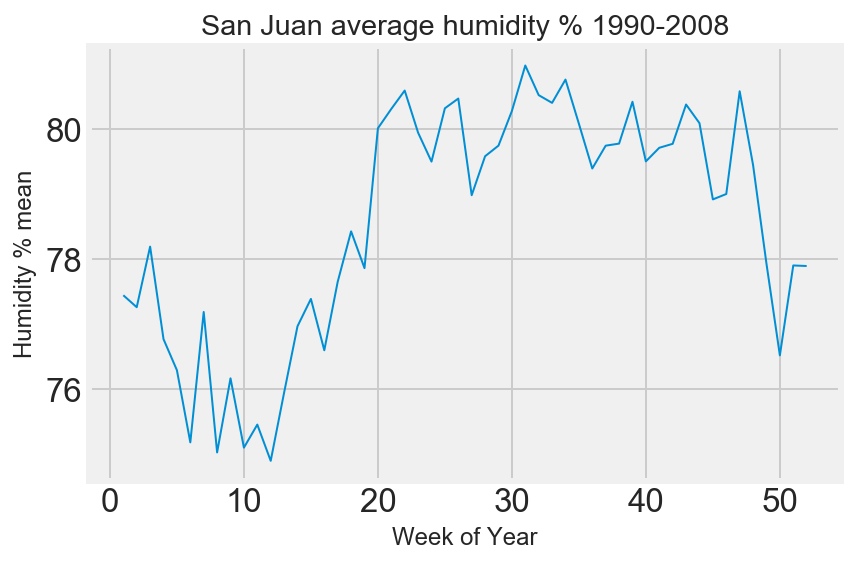

In [89]:
sjhum_perc_mean.plot(lw=1);

#plt.legend();

plt.title('San Juan average humidity % 1990-2008');
plt.xlabel('Week of Year')
plt.ylabel('Humidity % mean')

In [78]:
sjdiur_mean = san_juan.groupby('weekofyear').station_diur_temp_rng_c.mean()

Text(0,0.5,'Min_temp_k_mean')

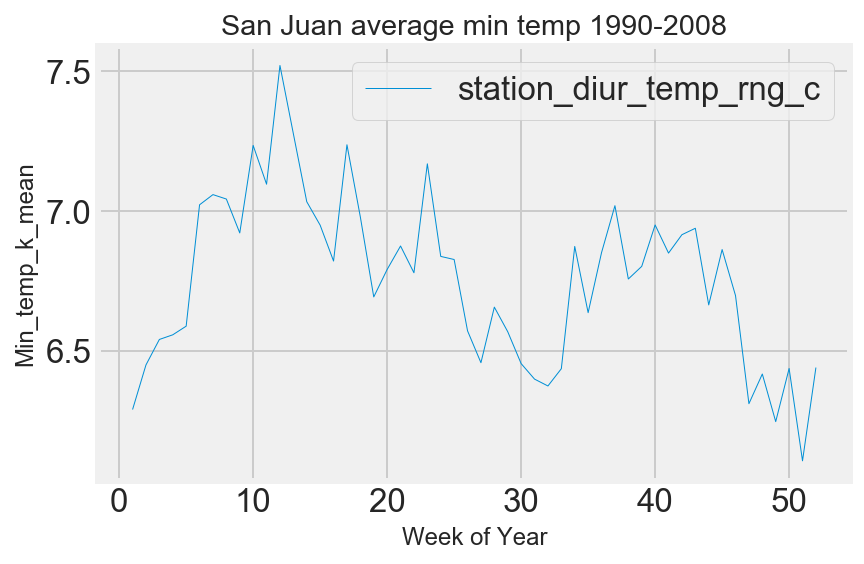

In [79]:
sjdiur_mean.plot(lw=0.5);
plt.legend();
plt.title('San Juan average min temp 1990-2008');
plt.xlabel('Week of Year')
plt.ylabel('Min_temp_k_mean')

In [73]:
sjmin_temp_k_mean = san_juan.groupby('weekofyear').reanalysis_min_air_temp_k.mean()

Text(0,0.5,'Min_temp_k_mean')

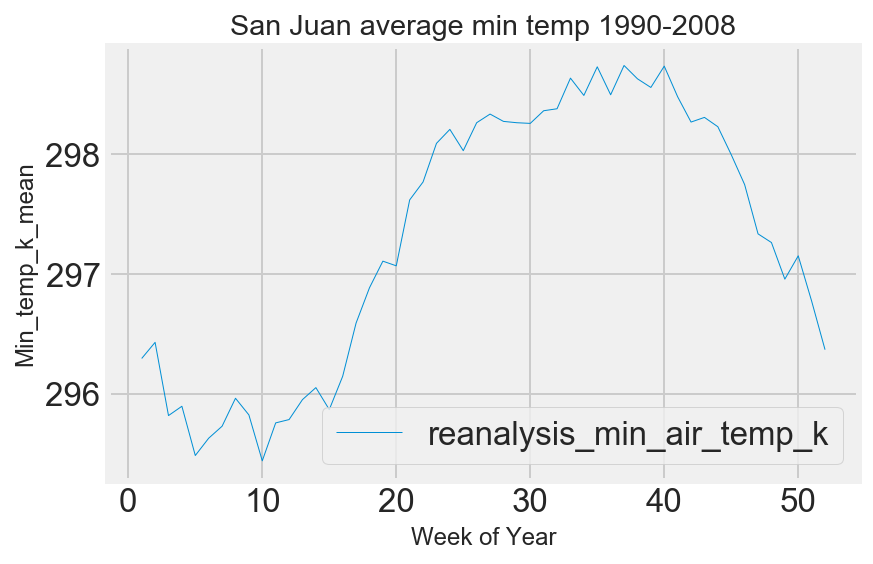

In [75]:
sjmin_temp_k_mean.plot(lw=0.5);
plt.legend();
plt.title('San Juan average min temp 1990-2008');
plt.xlabel('Week of Year')
plt.ylabel('Min_temp_k_mean')

In [99]:
sjtemp_k_mean = san_juan.groupby('weekofyear').reanalysis_air_temp_k.mean()

Text(0,0.5,'Ait temp in k')

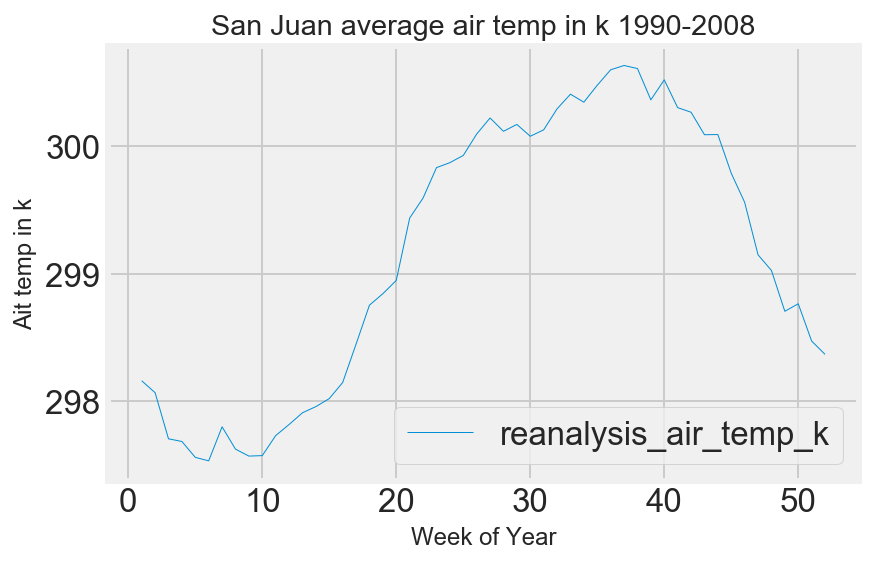

In [100]:
sjtemp_k_mean.plot(lw=0.5);
plt.legend();
plt.title('San Juan average air temp in k 1990-2008');
plt.xlabel('Week of Year')
plt.ylabel('Ait temp in k')

In [71]:
sjprecip_mean = san_juan.groupby('weekofyear').precipitation_amt_mm.mean()

Text(0,0.5,'Precipitation in mm')

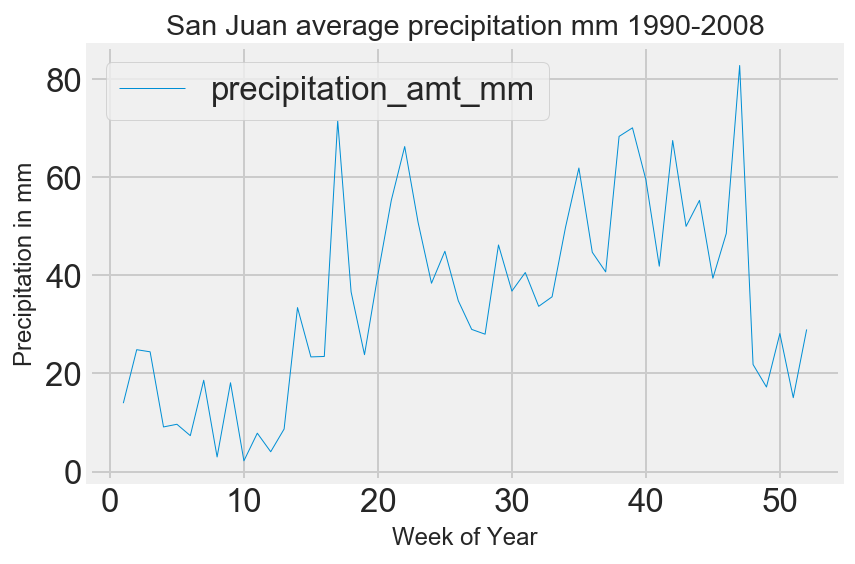

In [72]:
sjprecip_mean.plot(lw=0.5);
plt.legend();
plt.title('San Juan average precipitation mm 1990-2008');
plt.xlabel('Week of Year')
plt.ylabel('Precipitation in mm')

In [65]:
sjcases_mean = san_juan.groupby('weekofyear').total_cases.mean()

Text(0,0.5,'Number of Cases')

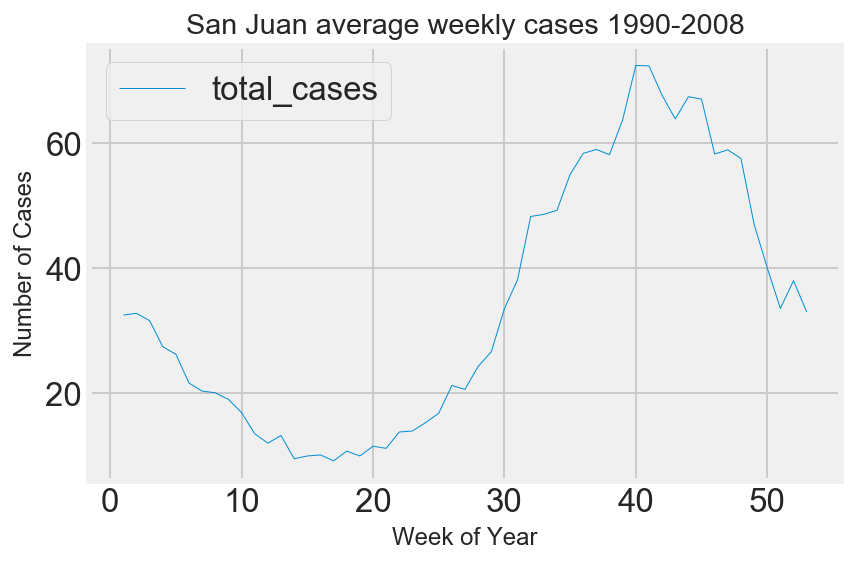

In [67]:
#San Juan has a clear pattern of when most dengues cases happen annually.
#34.18 cases/week is the baseline. Less cases happen between January to July. August to December have above average cases/week.
sjcases_mean.plot(lw=0.5);
plt.legend();
plt.title('San Juan average weekly cases 1990-2008');
plt.xlabel('Week of Year')
plt.ylabel('Number of Cases')

In [ ]:
iqcases_mean = iquitos.groupby('weekofyear').total_cases.mean()

Text(0,0.5,'Number of Cases')

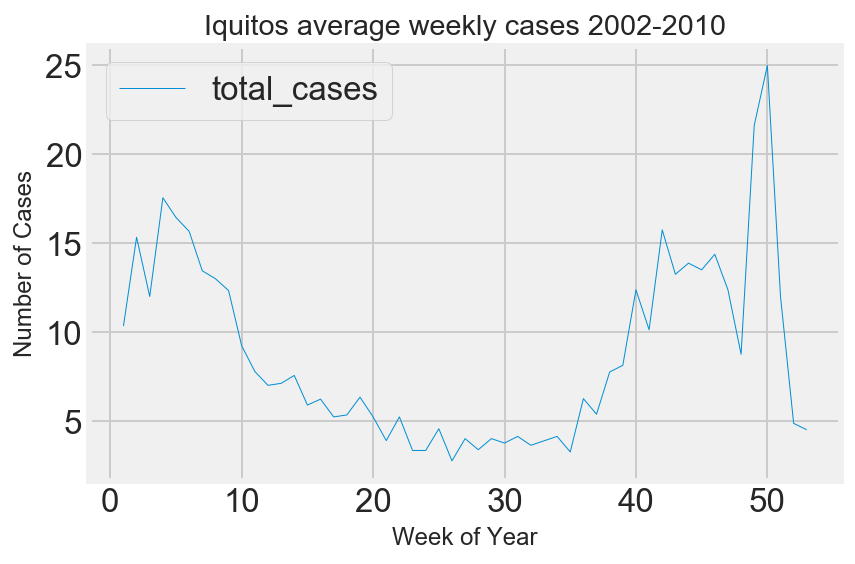

In [68]:
#Less clear pattern in Iquitos than San Juan.
#Baseline is 8.86. Less cases from march to September. Above average cases are from October to February.
iqcases_mean.plot(lw=0.5);
plt.legend();
plt.title('Iquitos average weekly cases 2002-2010');
plt.xlabel('Week of Year')
plt.ylabel('Number of Cases')

In [93]:
iqhum_kg_mean = iquitos.groupby('weekofyear').reanalysis_specific_humidity_g_per_kg.mean()

Text(0,0.5,'Humidity in kg')

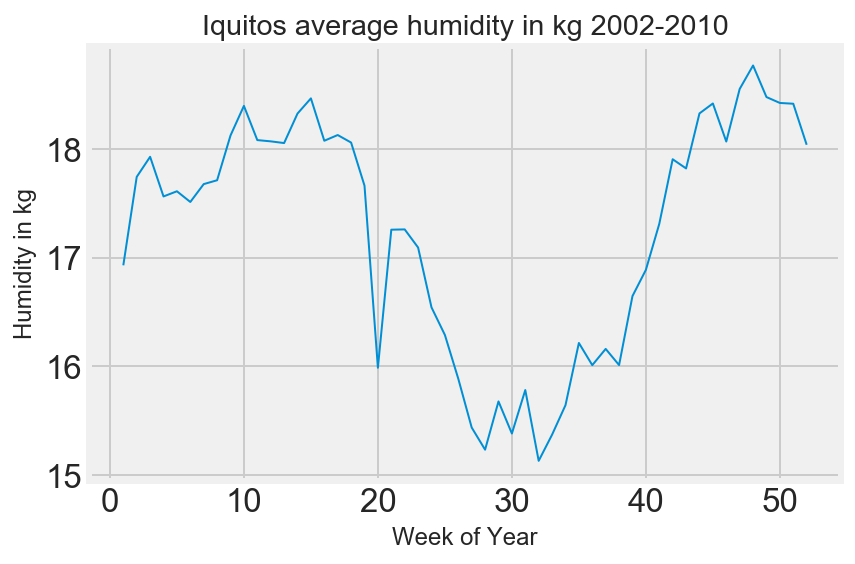

In [96]:
iqhum_kg_mean.plot(lw=1);
#plt.legend();
plt.title('Iquitos average humidity in kg 2002-2010');
plt.xlabel('Week of Year')
plt.ylabel('Humidity in kg')

In [97]:
iqtemp_k_mean = iquitos.groupby('weekofyear').reanalysis_air_temp_k.mean()

Text(0,0.5,'Air temp in k')

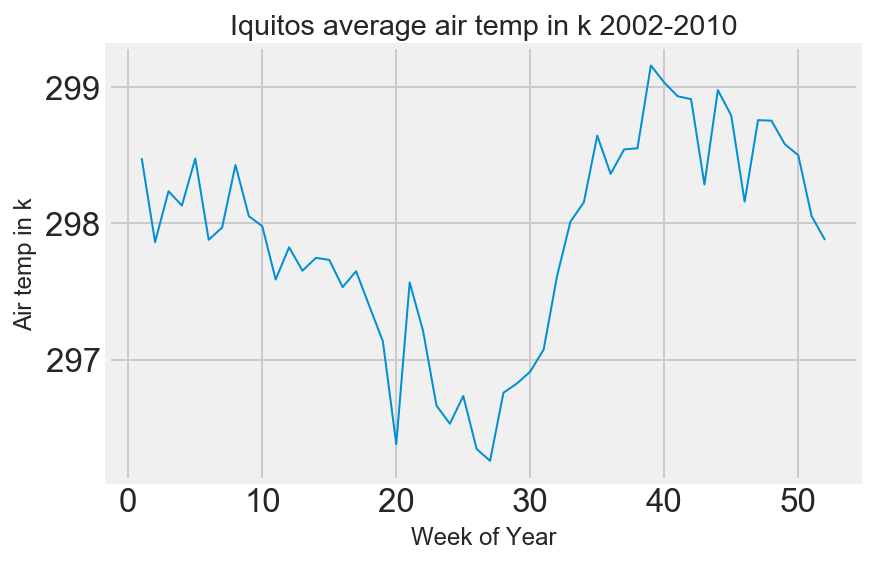

In [98]:
iqtemp_k_mean.plot(lw=1);
#plt.legend();
plt.title('Iquitos average air temp in k 2002-2010');
plt.xlabel('Week of Year')
plt.ylabel('Air temp in k')

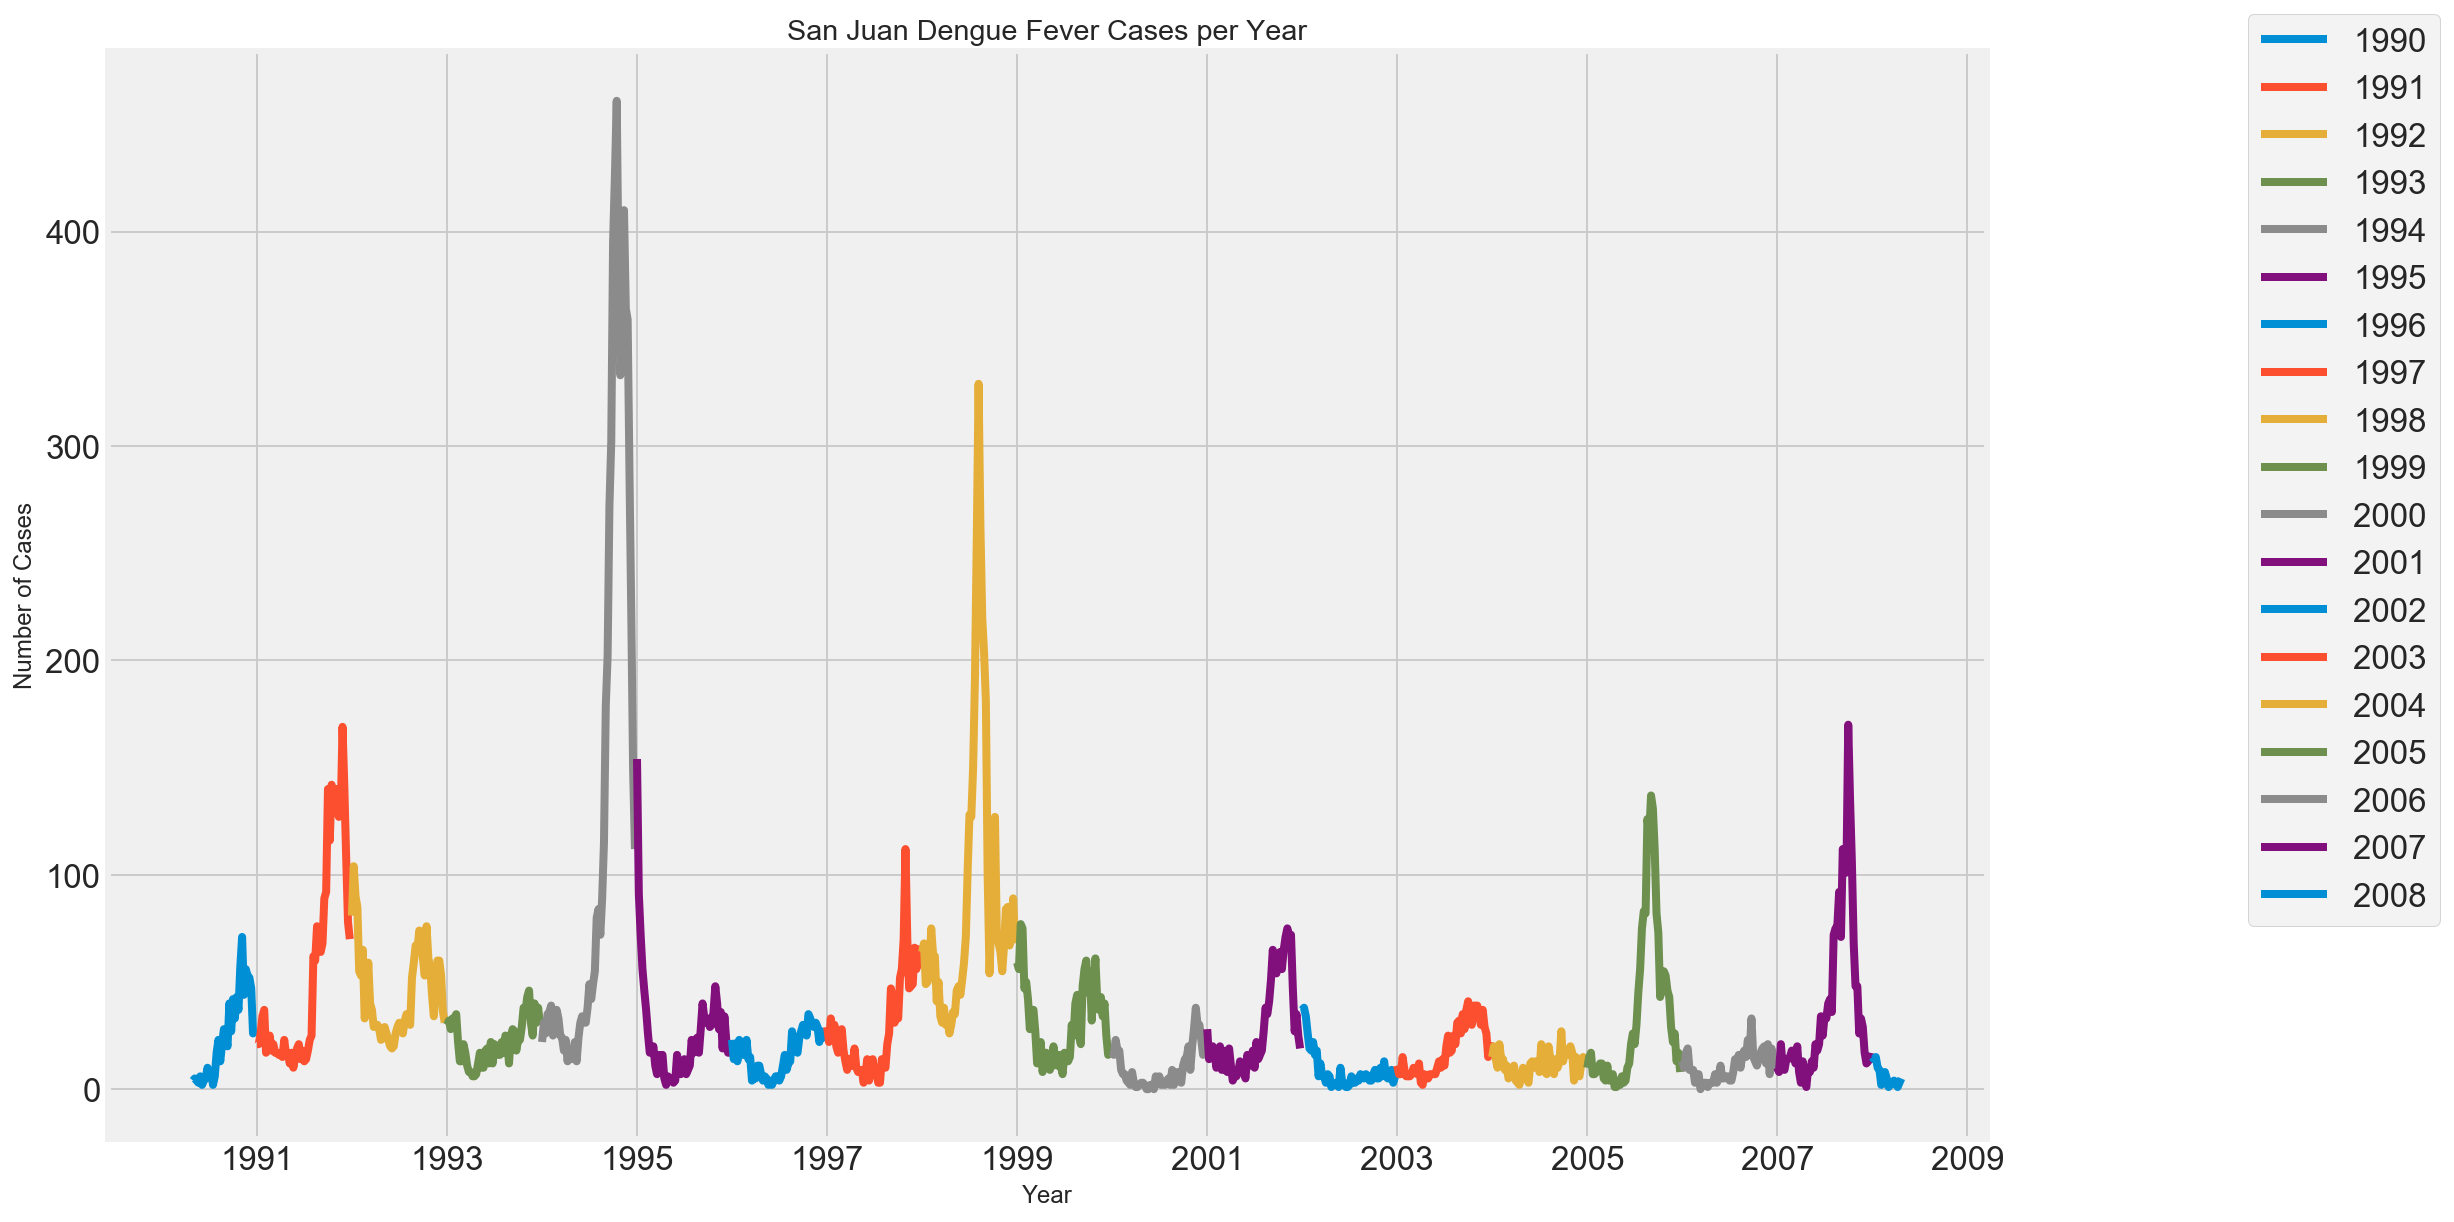

In [138]:
fig,ax = plt.subplots(figsize=(15,10))
for i in np.unique(san_juan.week_start_date.dt.year.values):
    plt.plot(san_juan[san_juan.week_start_date.dt.year==i].week_start_date.T,san_juan[san_juan.week_start_date.dt.year==i].total_cases,label='%d'%(i));
    plt.legend();
    plt.title('San Juan Dengue Fever Cases per Year');
    plt.xlabel('Year')
    plt.ylabel('Number of Cases')
#plt.savefig('dengue.png')
    ax.legend(bbox_to_anchor=(1.25, 1.05))

In [43]:
#not many total_cases missing. very possible to only have 5 weeks of no dengue cases in the space of 20years
dengue_merged[(dengue_merged.total_cases==0)].week_start_date.head()

522    2000-05-13
523    2000-05-20
526    2000-06-10
825    2006-03-12
936    2000-07-01
Name: week_start_date, dtype: object

In [44]:
#location of no dengue reported cases
dengue_train_cases[(dengue_train_cases.total_cases==0)].city.head()

522    sj
523    sj
526    sj
825    sj
936    iq
Name: city, dtype: object

In [45]:
sj_cases = dengue_merged[dengue_merged['city'] == 'sj']
sj_cases.week_start_date = pd.to_datetime(sj_cases.week_start_date)

In [46]:
iq_cases = dengue_merged[dengue_merged['city'] == 'iq']
iq_cases.week_start_date = pd.to_datetime(iq_cases.week_start_date)

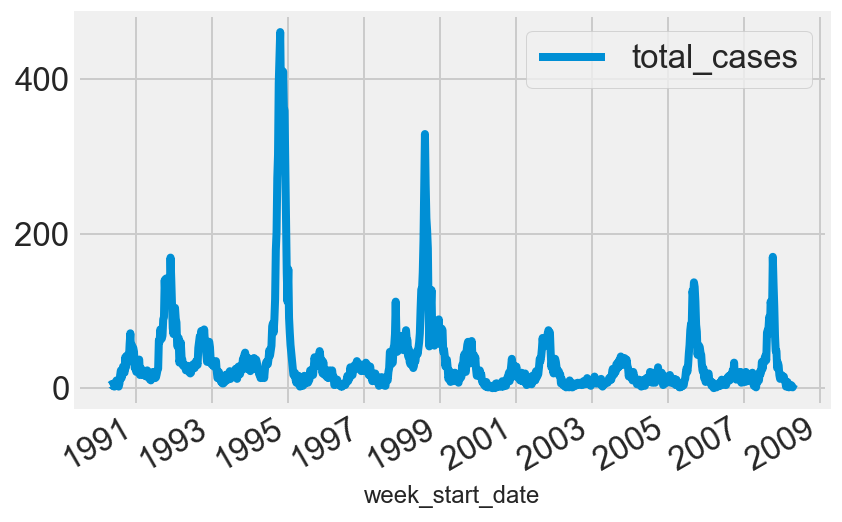

In [47]:
#Outbreak end of 1994 and 1998
sj_cases.plot.line(x='week_start_date', y='total_cases')

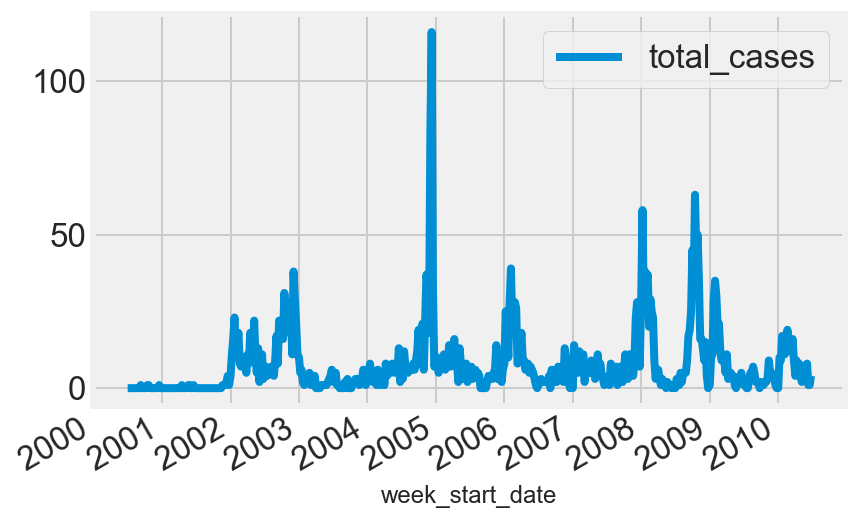

In [48]:
#flat line at beginning of chart-lots of 0 cases. Need to investigate if this is correct. 
#outbreak end of 2004.
iq_cases.plot.line(x='week_start_date', y='total_cases')

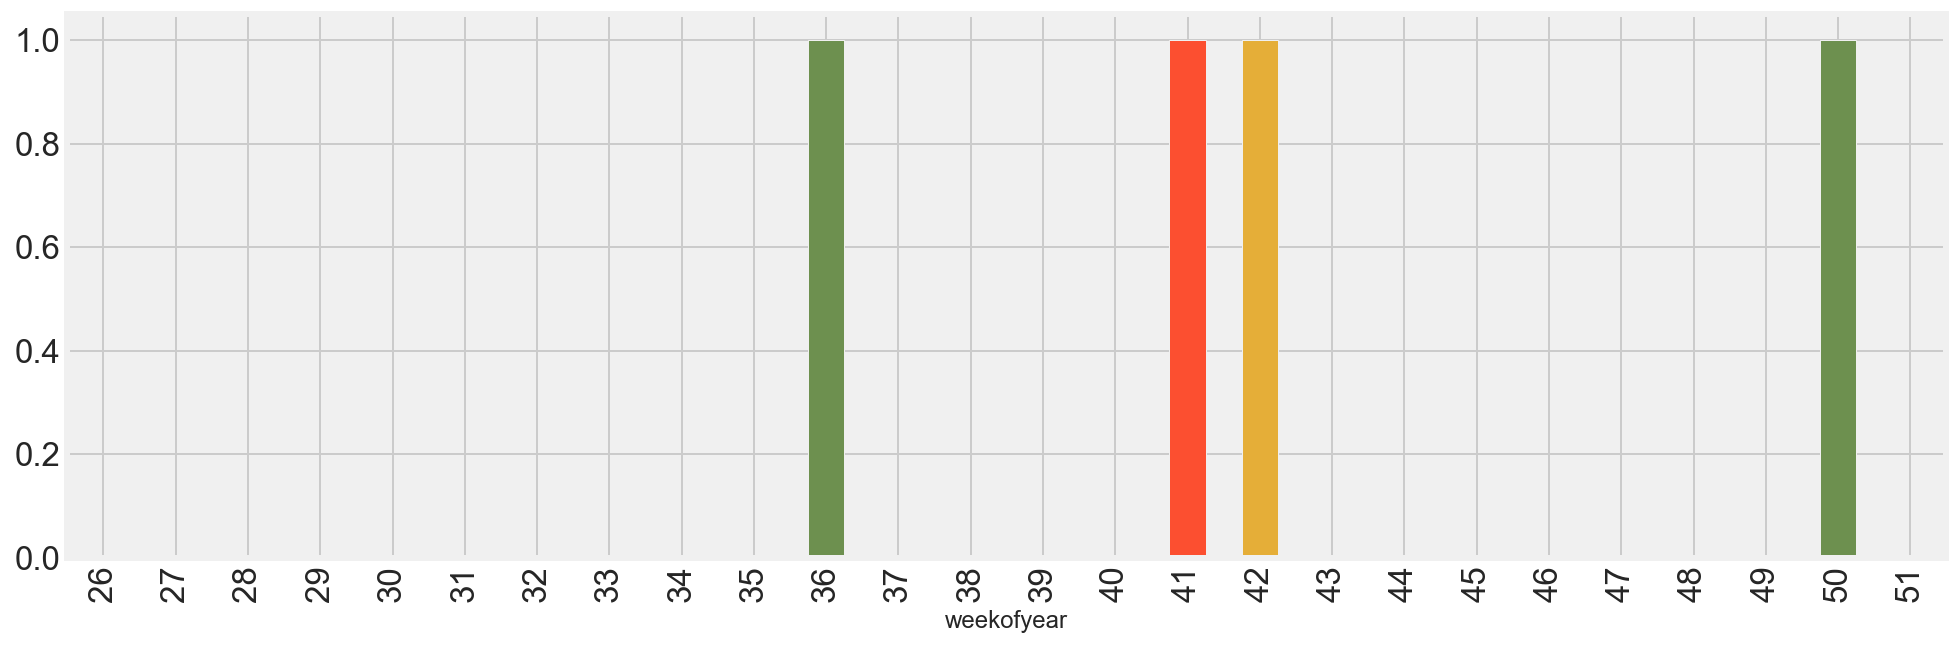

In [49]:
#hardly any data. Highly unlikely no dengue cases in 2000 in Iquitos. Remove year?
yearly_pattern('iq', 2000)

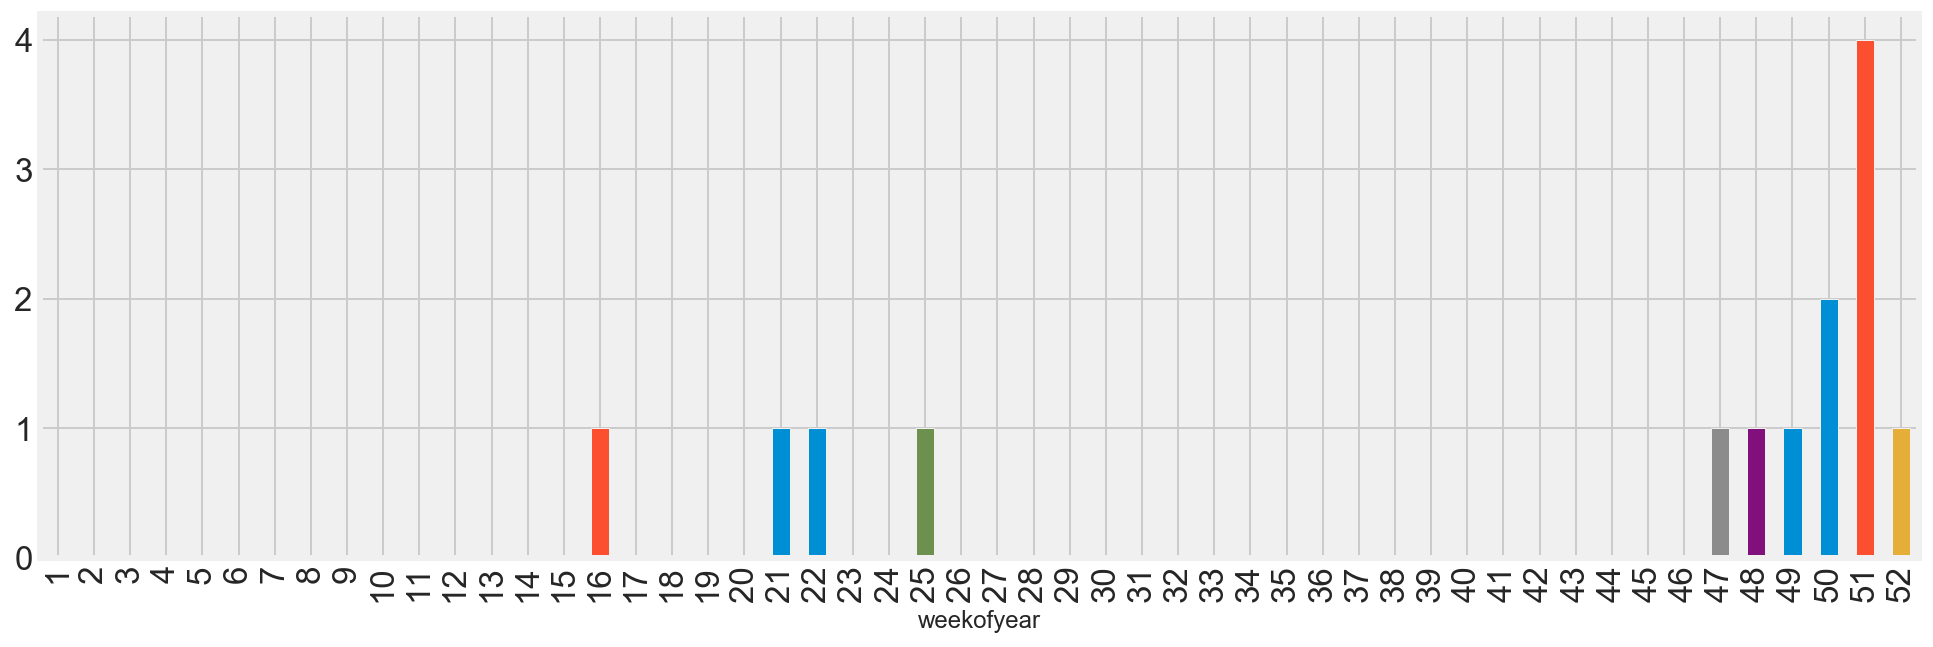

In [50]:
#hardly any data. Highly unlikely no dengue cases in 2000 in Iquitos. Remove year?
yearly_pattern('iq', 2001)

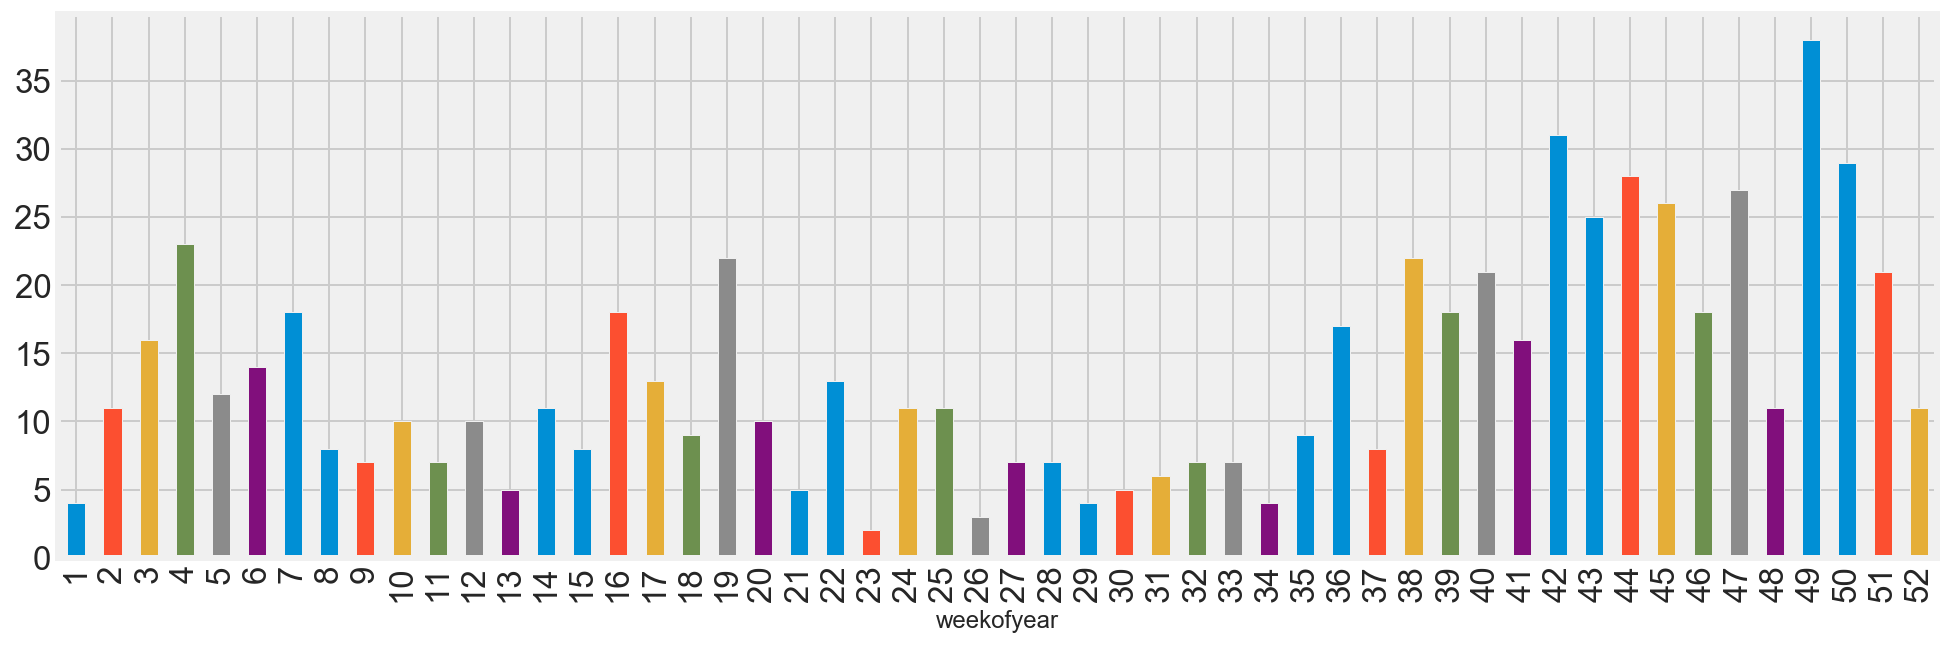

In [51]:
yearly_pattern('iq', 2002)

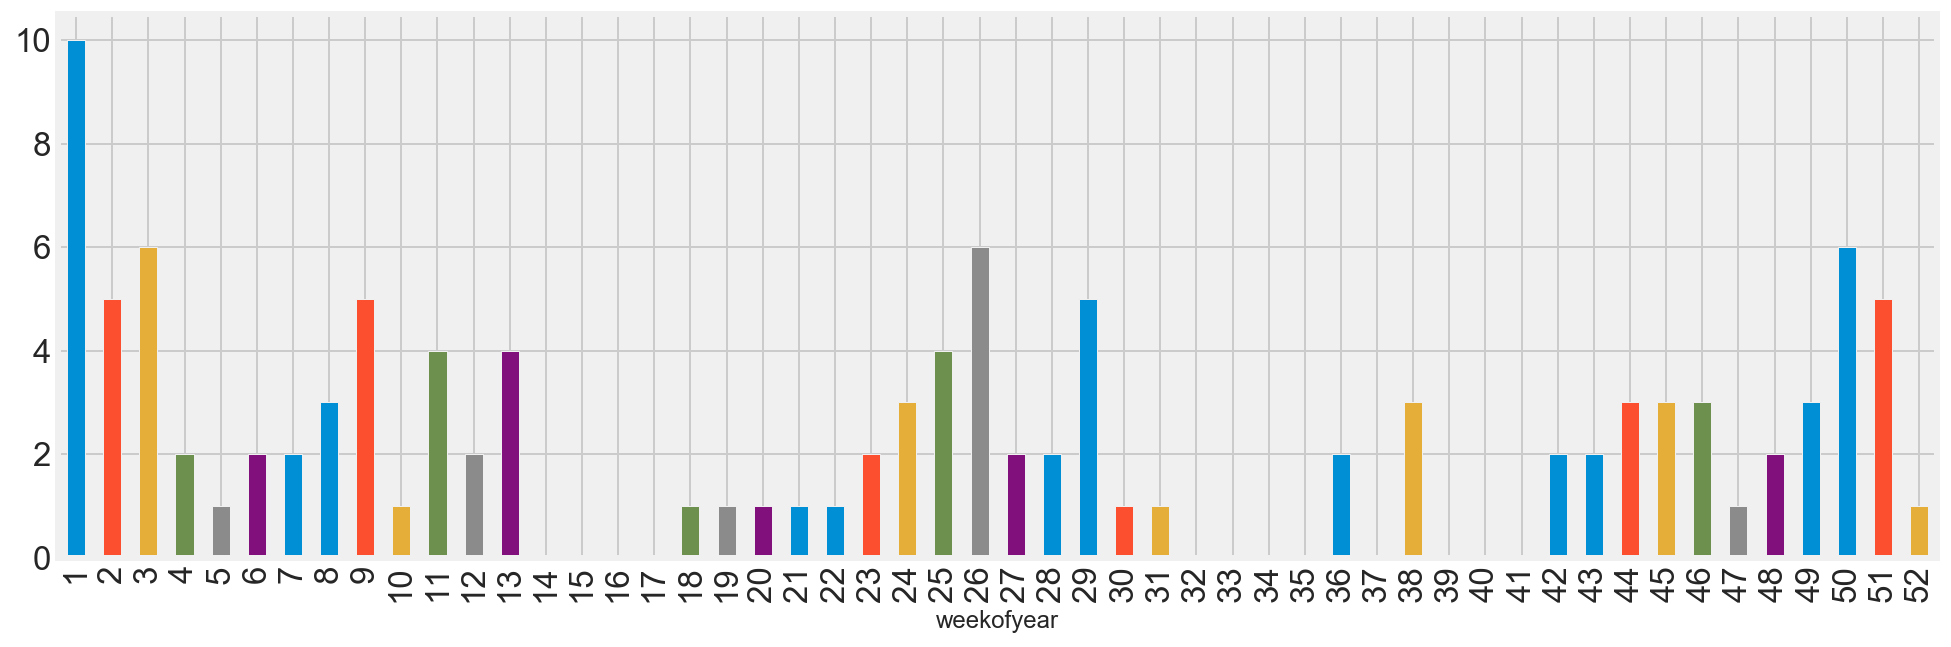

In [52]:
yearly_pattern('iq', 2003)

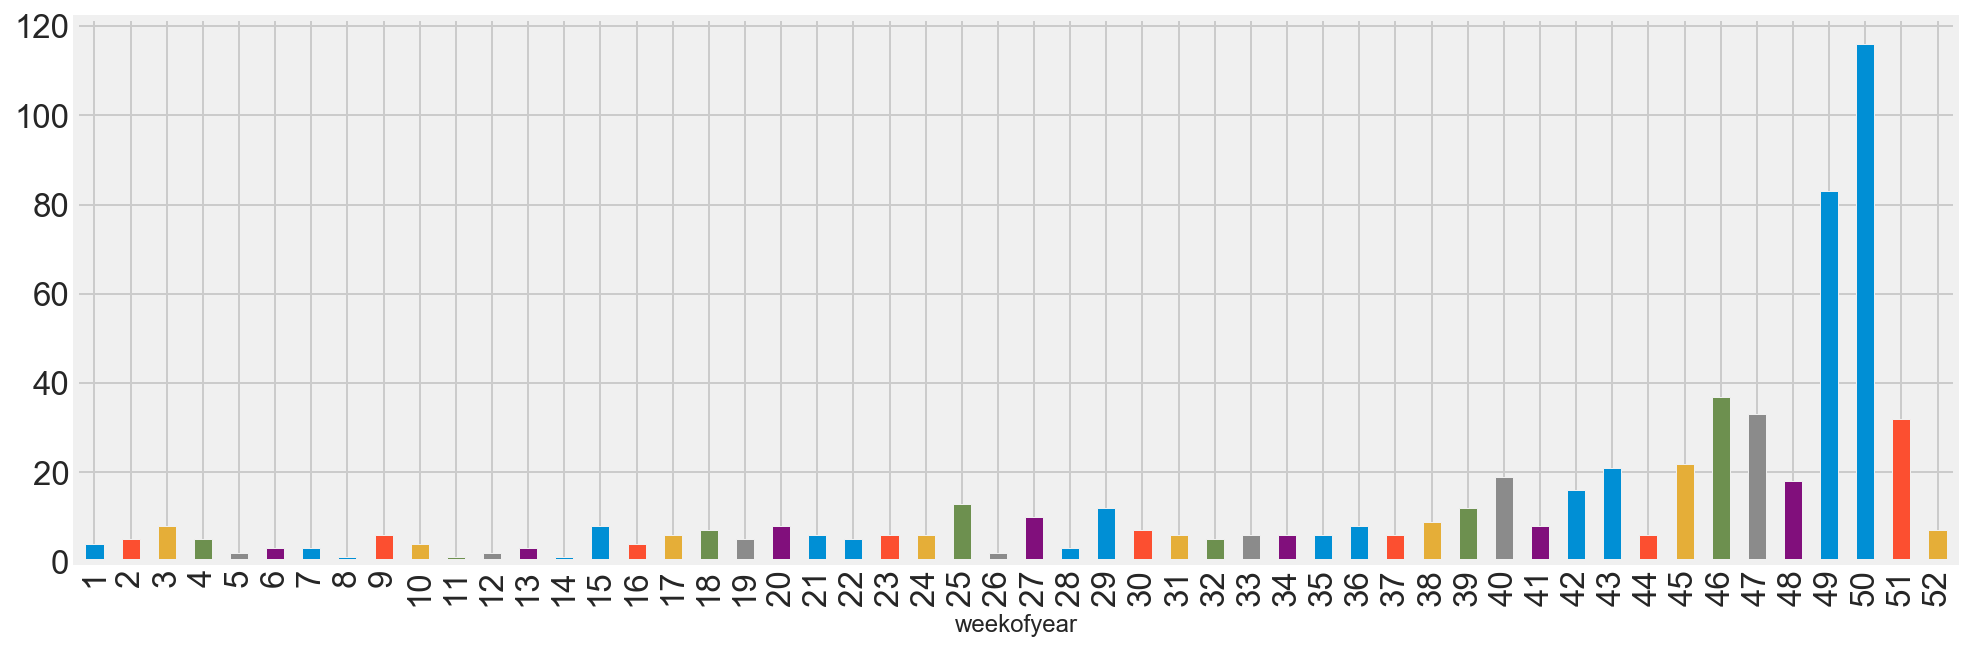

In [53]:
#Outbreak, over 110 cases
yearly_pattern('iq', 2004)

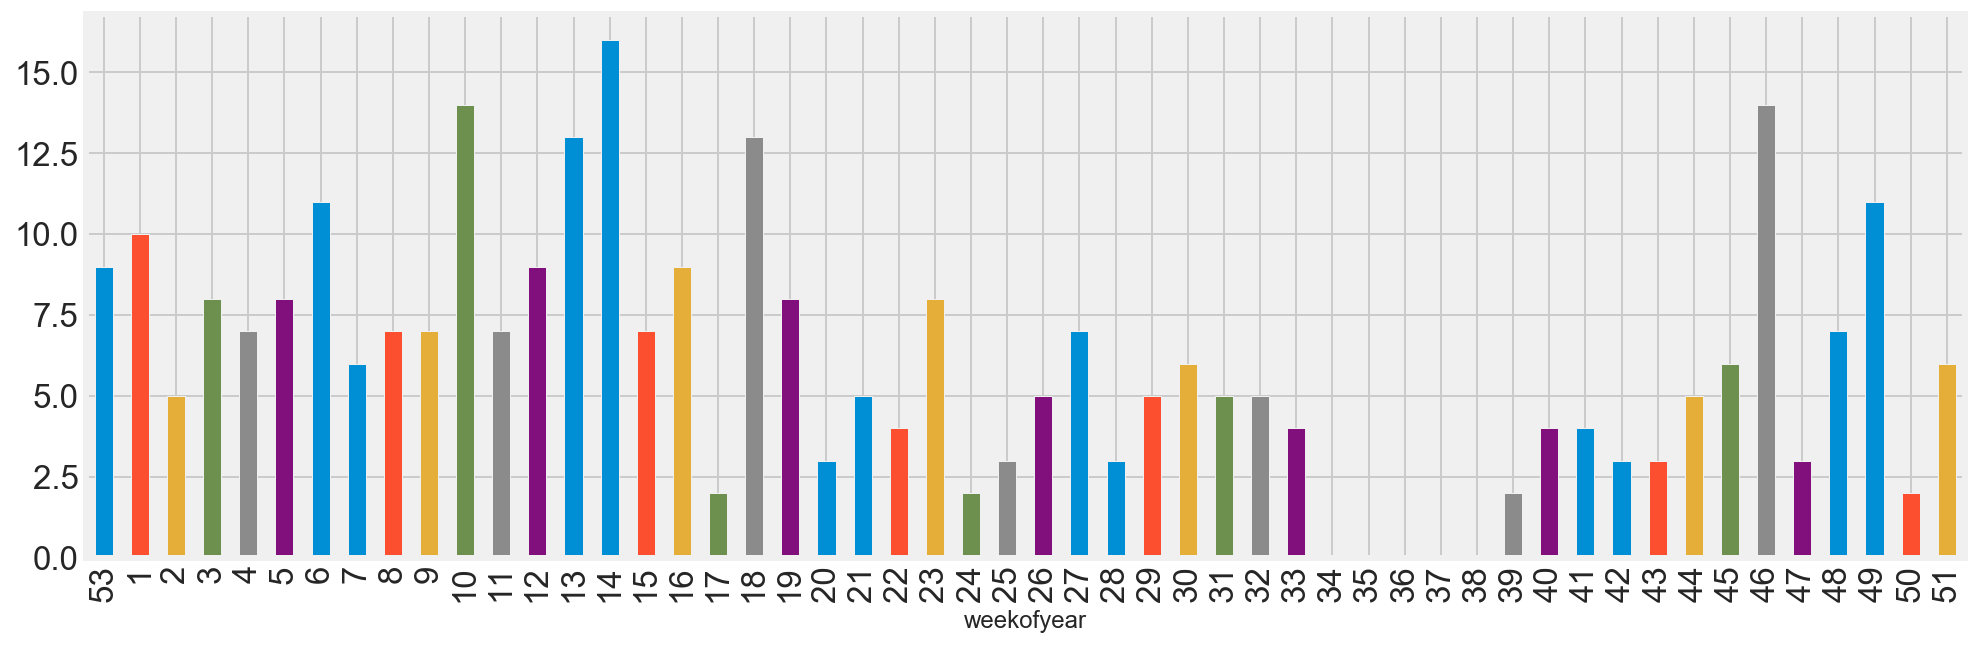

In [54]:
yearly_pattern('iq', 2005)

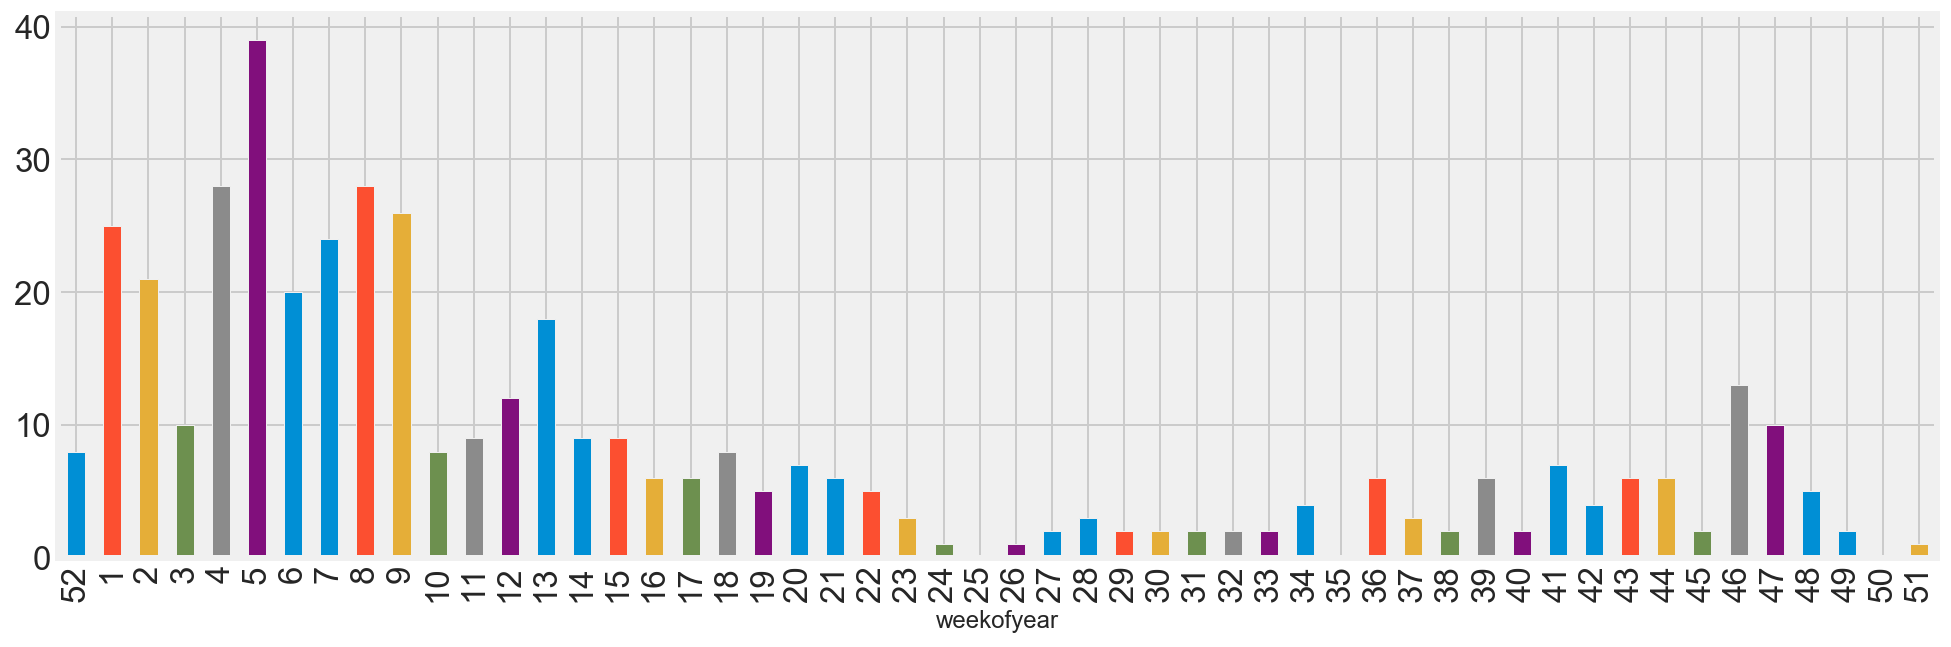

In [55]:
yearly_pattern('iq', 2006)

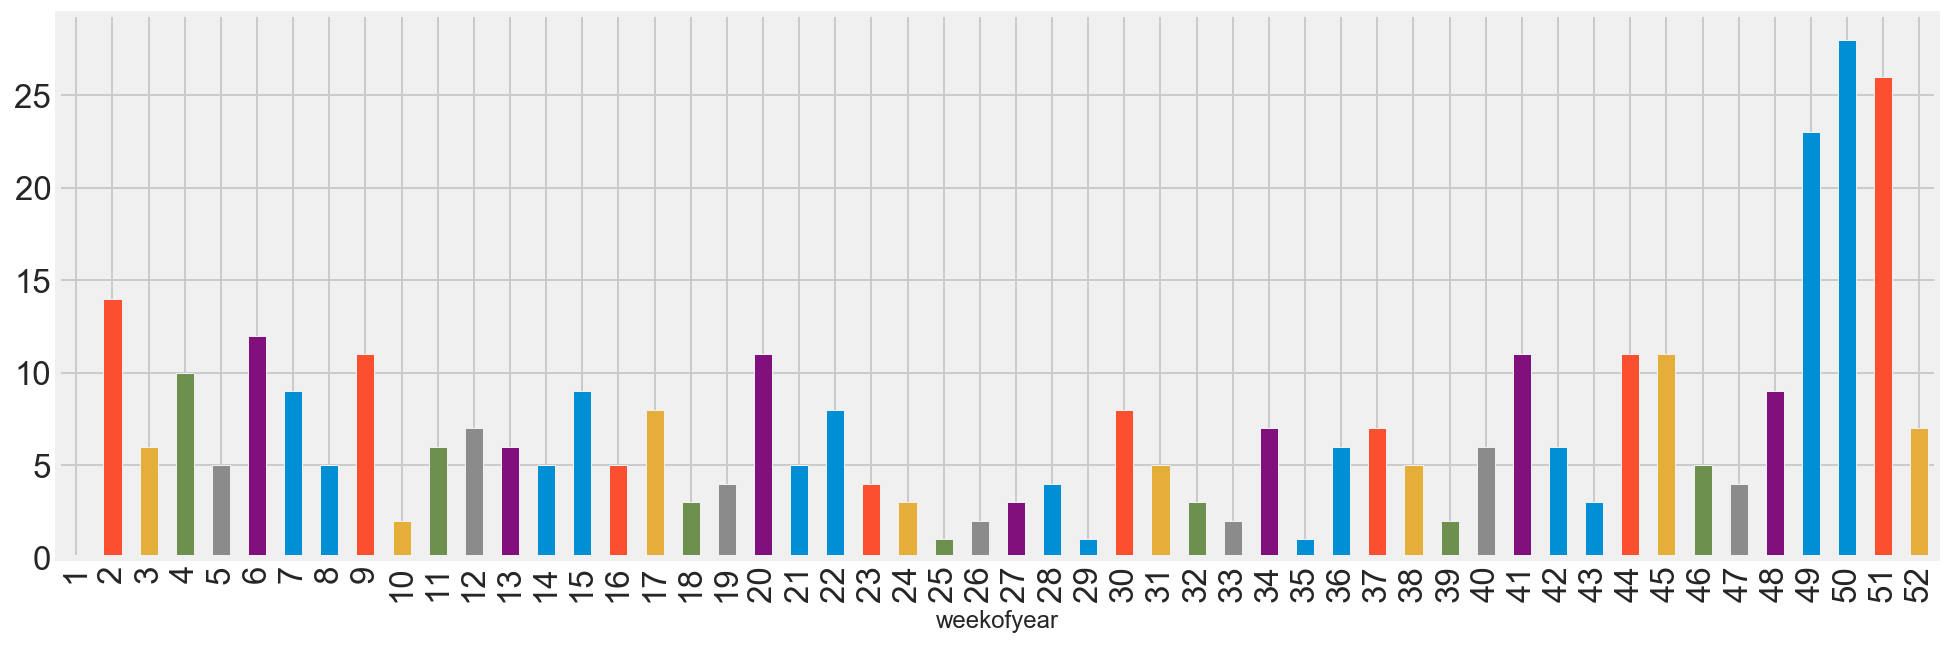

In [56]:
yearly_pattern('iq', 2007)

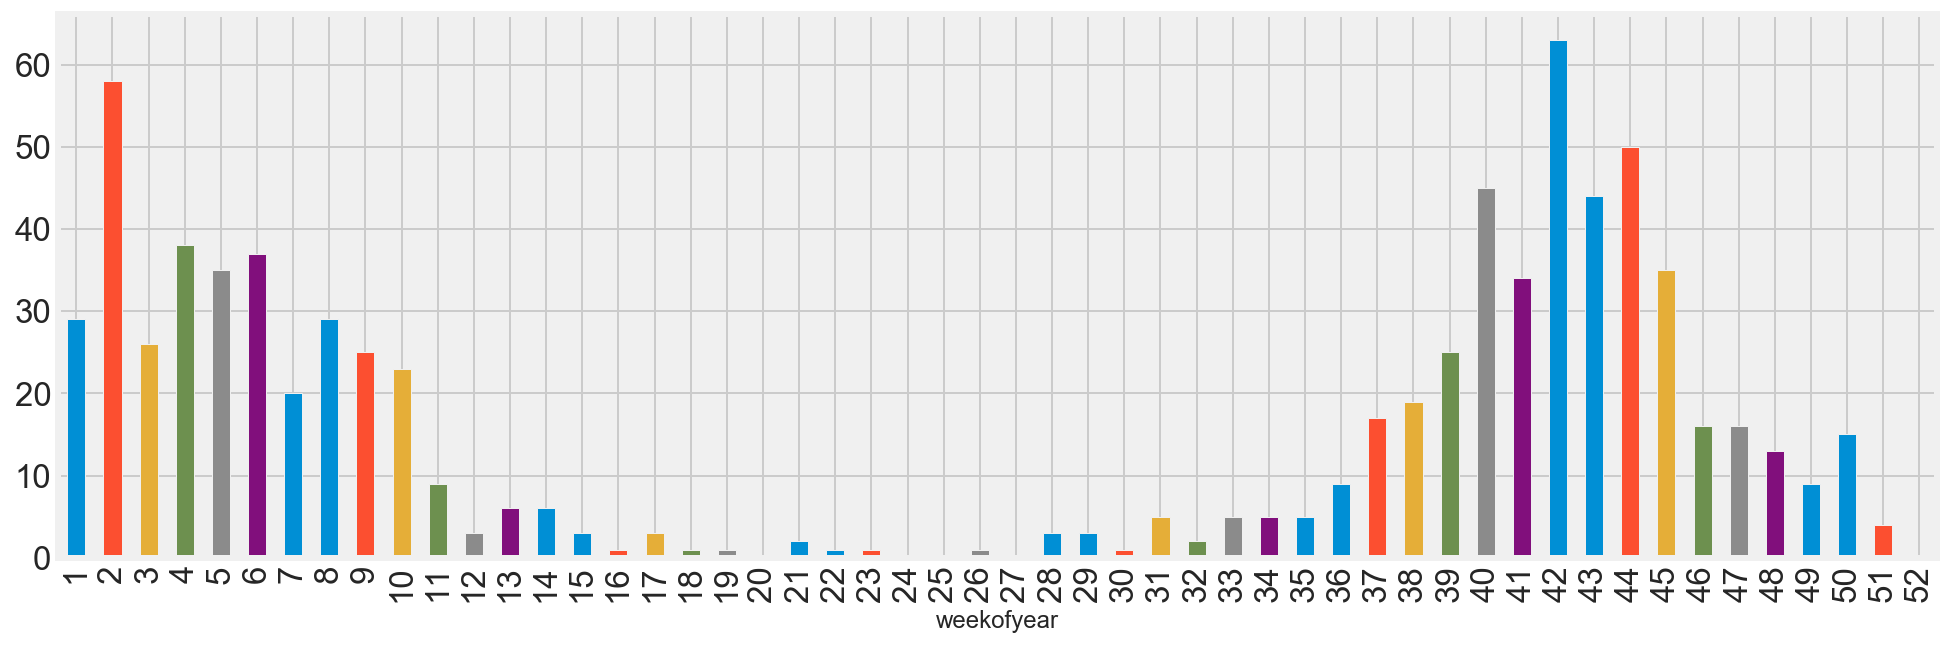

In [57]:
#Outbreak. Over 60 cases
yearly_pattern('iq', 2008)

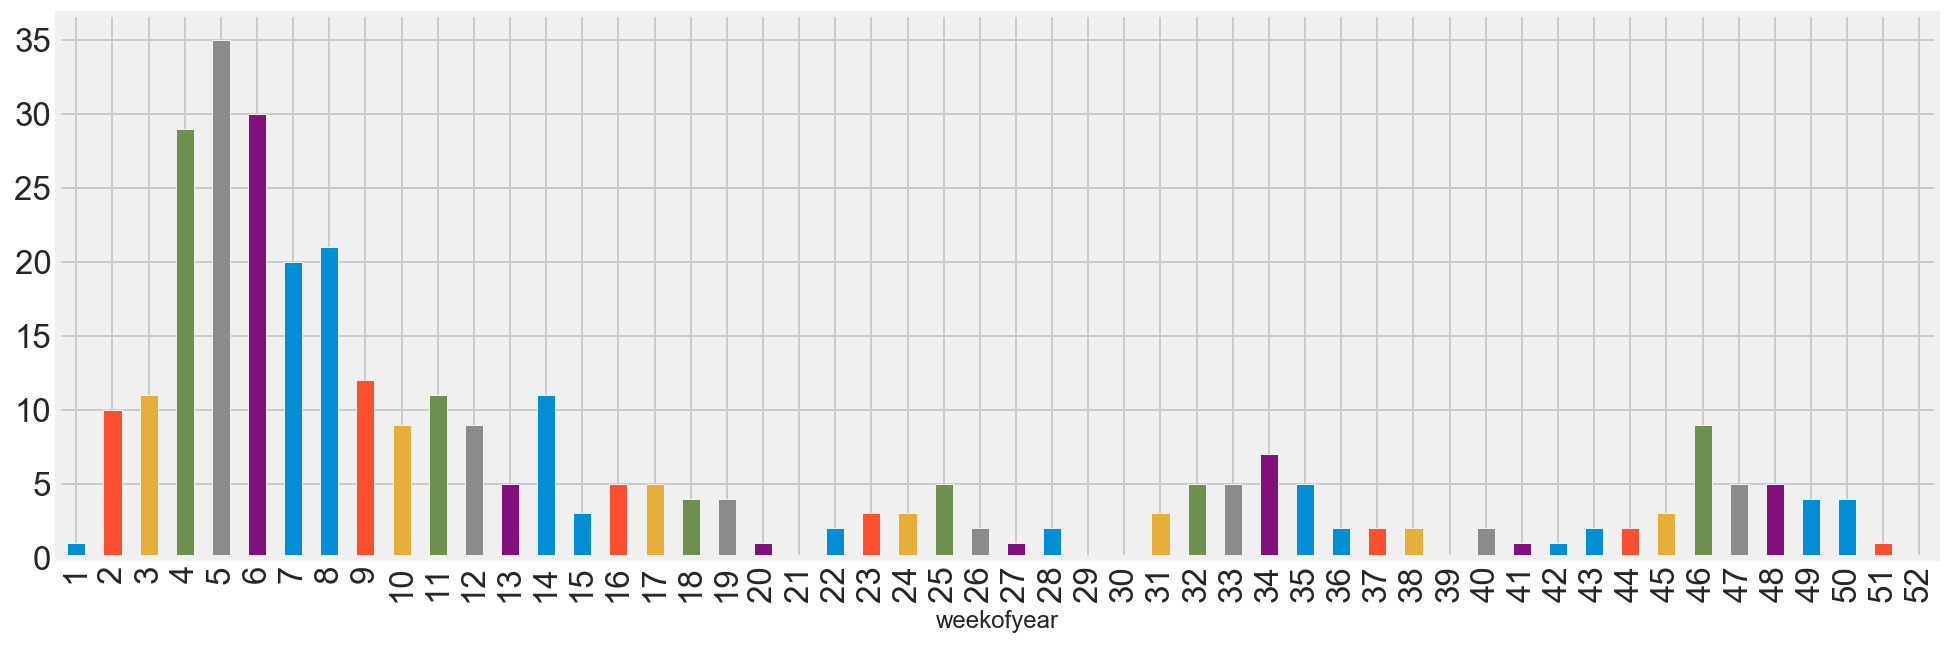

In [58]:
yearly_pattern('iq', 2009)

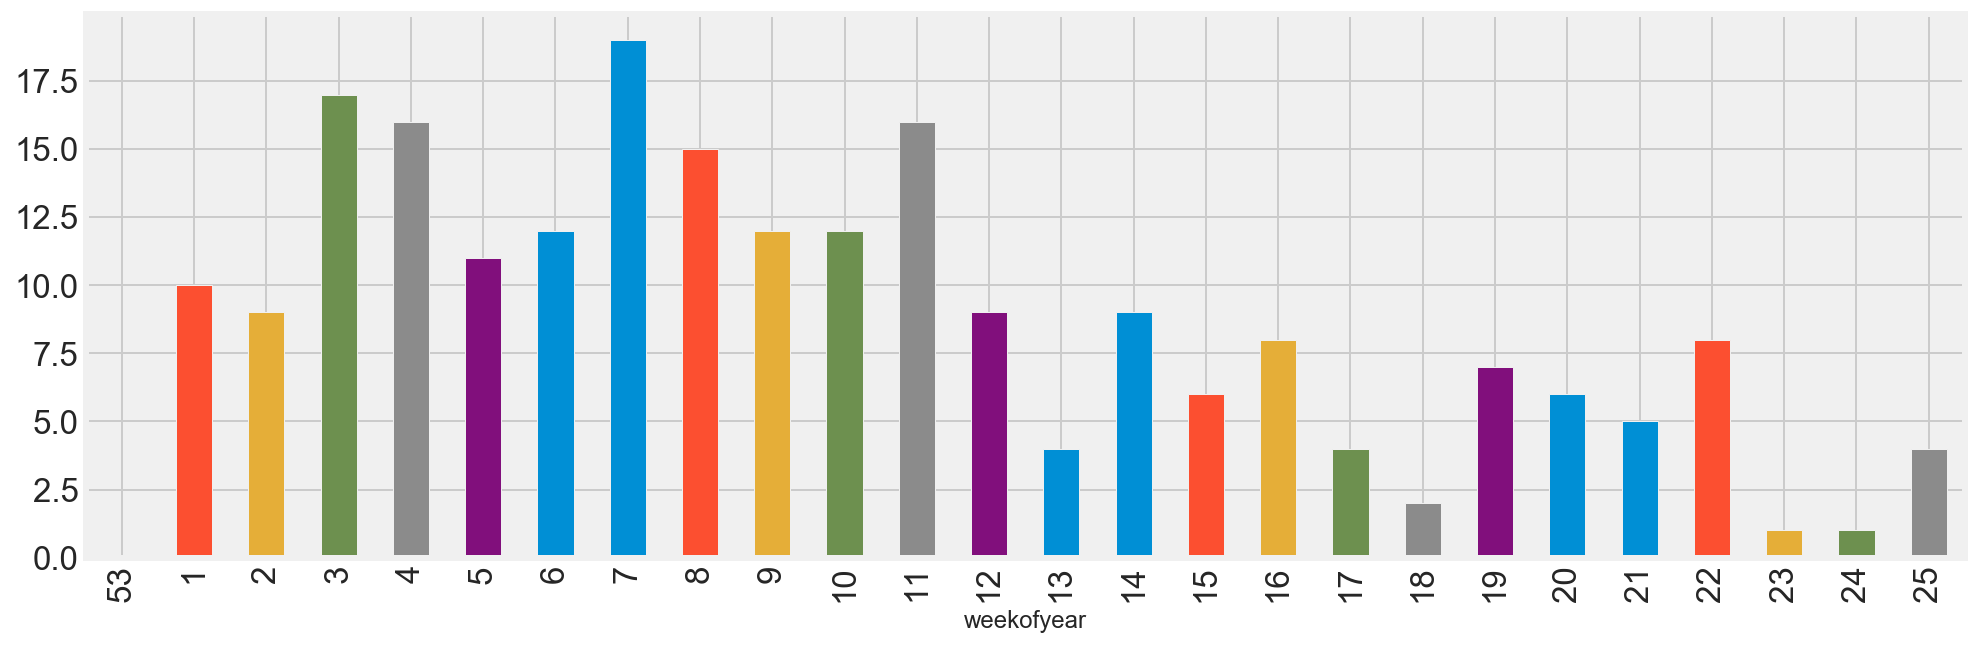

In [59]:
yearly_pattern('iq', 2010)

In [60]:
iq_cases.total_cases.describe()

count    520.000000
mean       7.565385
std       10.765478
min        0.000000
25%        1.000000
50%        5.000000
75%        9.000000
max      116.000000
Name: total_cases, dtype: float64

In [124]:
#using from year 2001 as missing so much data
iquitos = dengue_merged[(dengue_merged['city']=='iq')&(dengue_merged['year']>2001)]

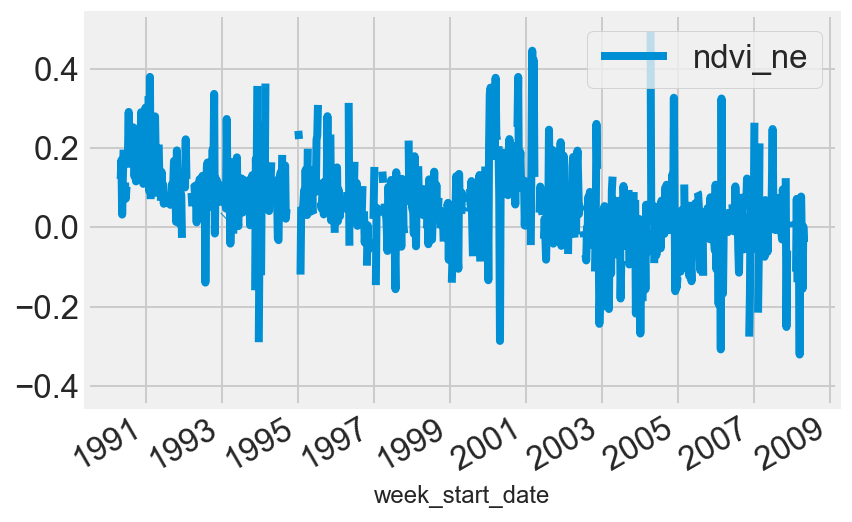

In [61]:
#lots of missing data 'ndvi_ne'
sj_cases.plot.line(x='week_start_date', y='ndvi_ne')

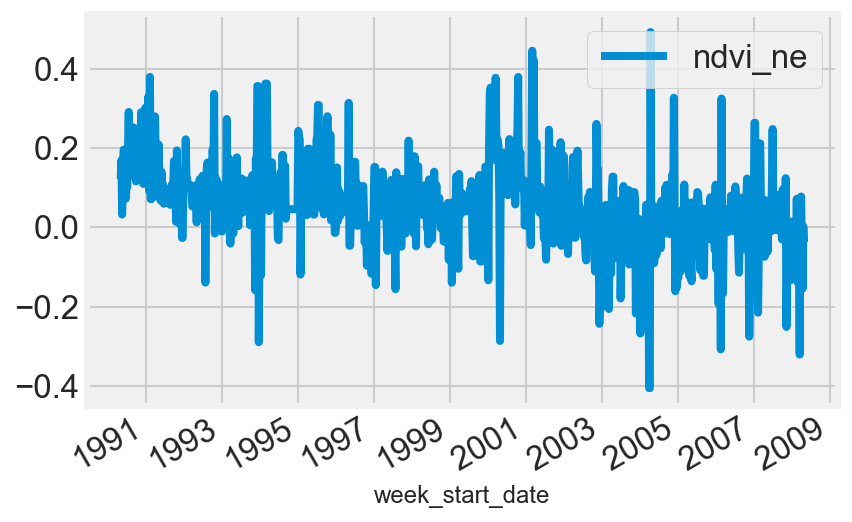

In [62]:
#use forwardfill 
sj_cases.fillna(method="ffill").plot.line(x='week_start_date', y='ndvi_ne')

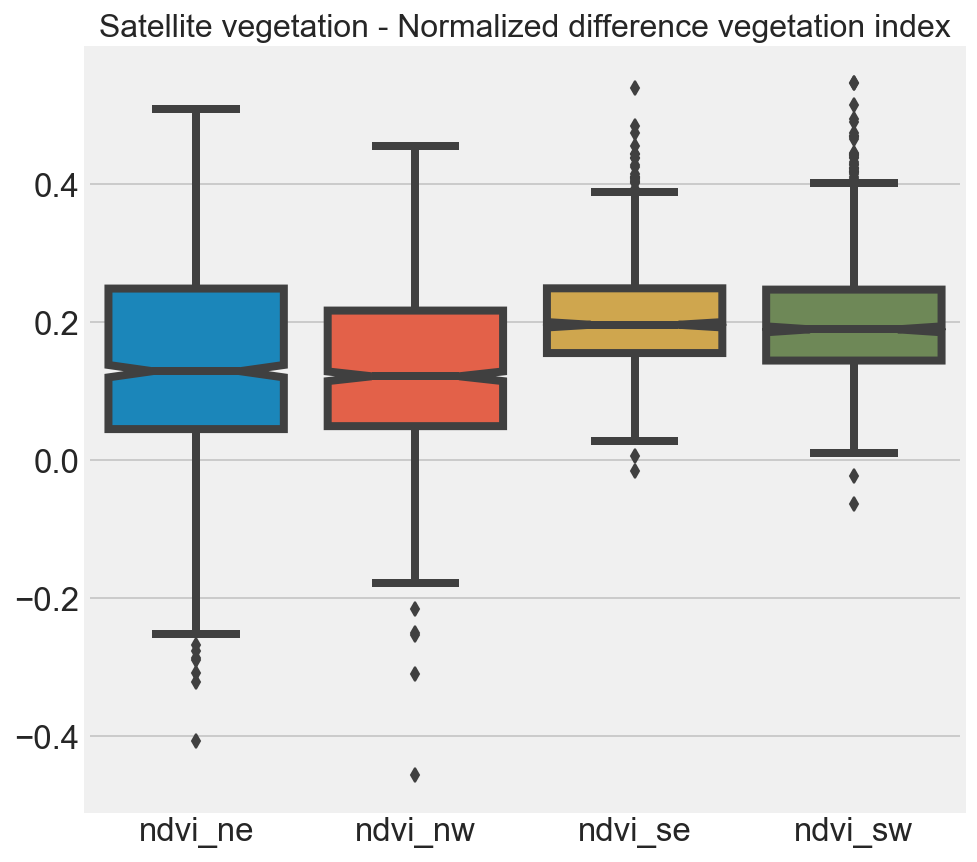

In [65]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()

ax = sns.boxplot(data=dengue_merged[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']], ax=ax, notch=True)

ax.set_title('Satellite vegetation - Normalized difference vegetation index', fontsize=16)

plt.show()

<Figure size 432x288 with 0 Axes>

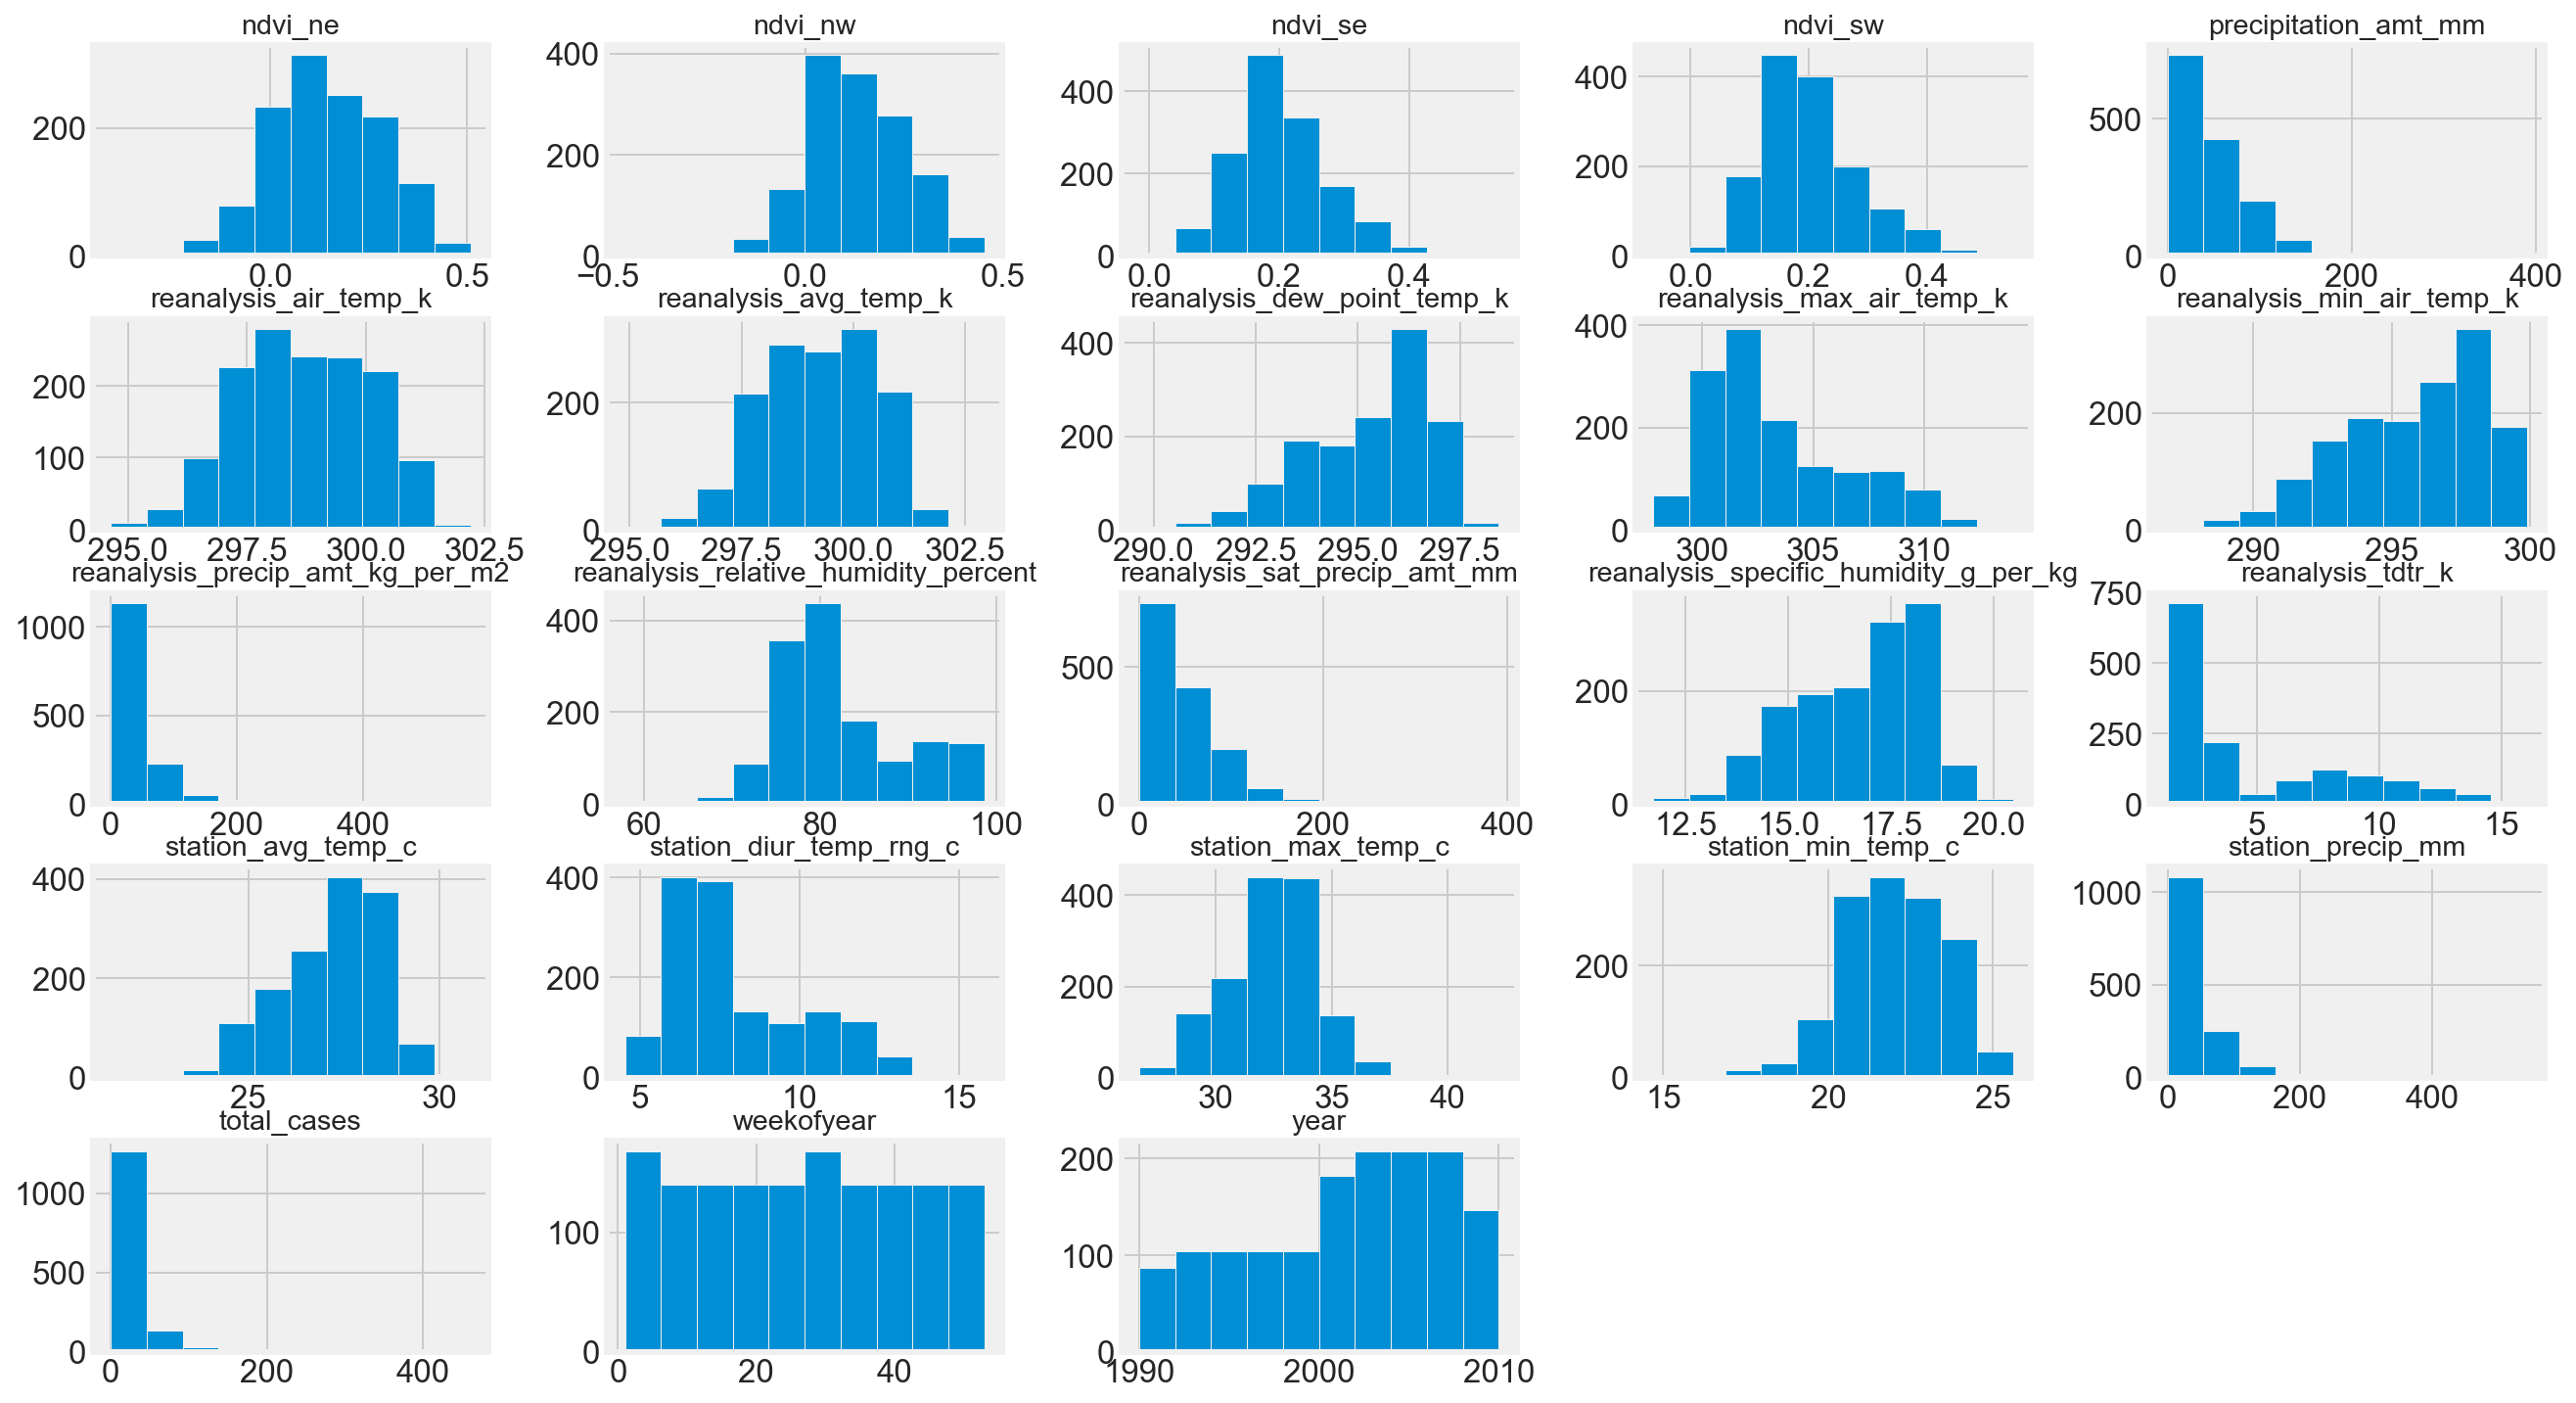

In [67]:
#general visualization 
#'precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 
# 'reanalysis_tdtr_k' have similar pattern to target total_cases.
plt.figure()
dengue_merged.hist(figsize=(20,20), layout=(8,5))
plt.show()

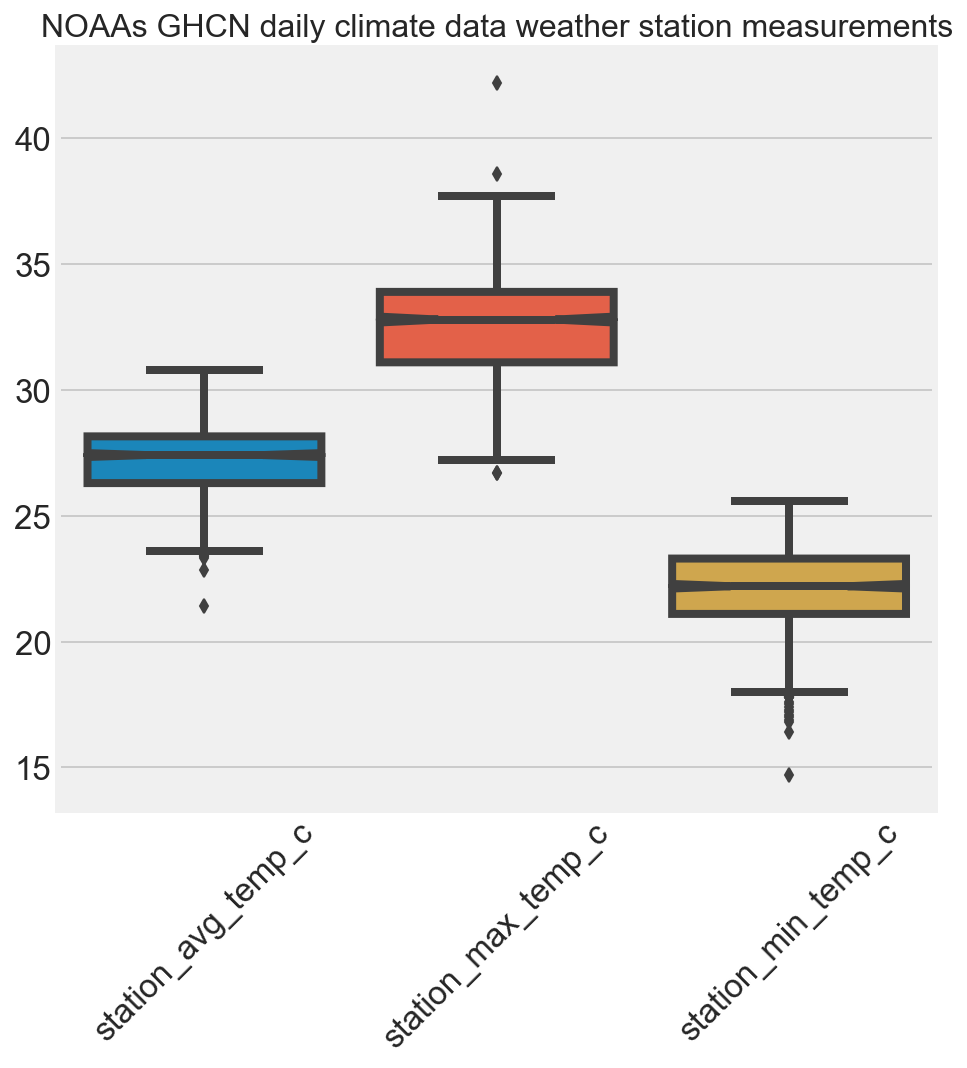

In [68]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()

ax = sns.boxplot(data=dengue_merged[['station_avg_temp_c', 'station_max_temp_c',
       'station_min_temp_c',]], ax=ax, notch=True)

ax.set_title('NOAAs GHCN daily climate data weather station measurements', fontsize=16)
plt.xticks(rotation=45)

plt.show()

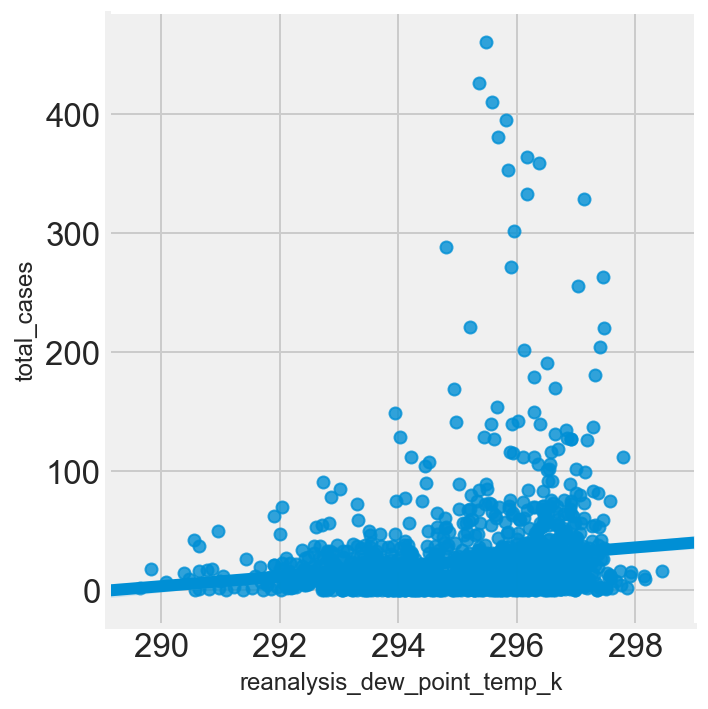

In [70]:
#more dew, greater chance of outbreak?
sns.lmplot('reanalysis_dew_point_temp_k','total_cases',dengue_merged)

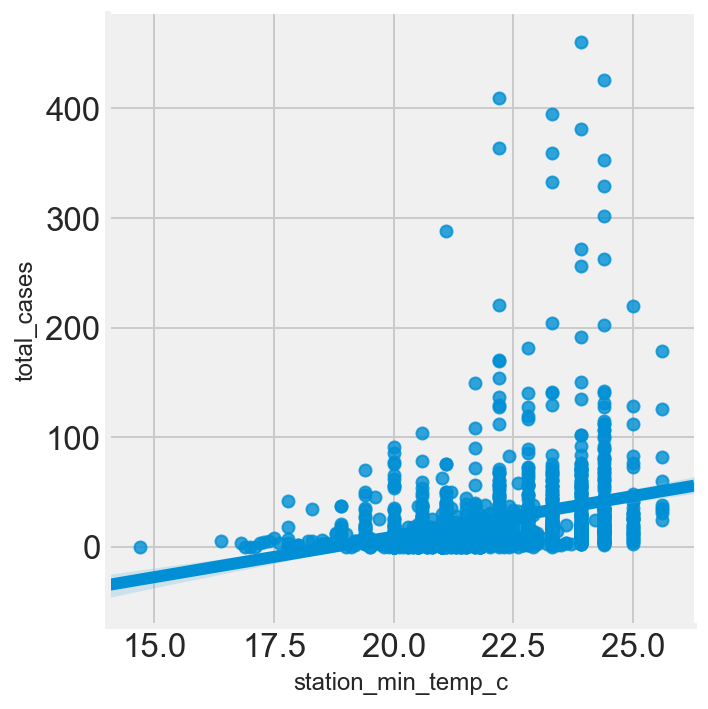

In [71]:
#higher min temp, greater chance of outbreak
sns.lmplot('station_min_temp_c','total_cases',dengue_merged)

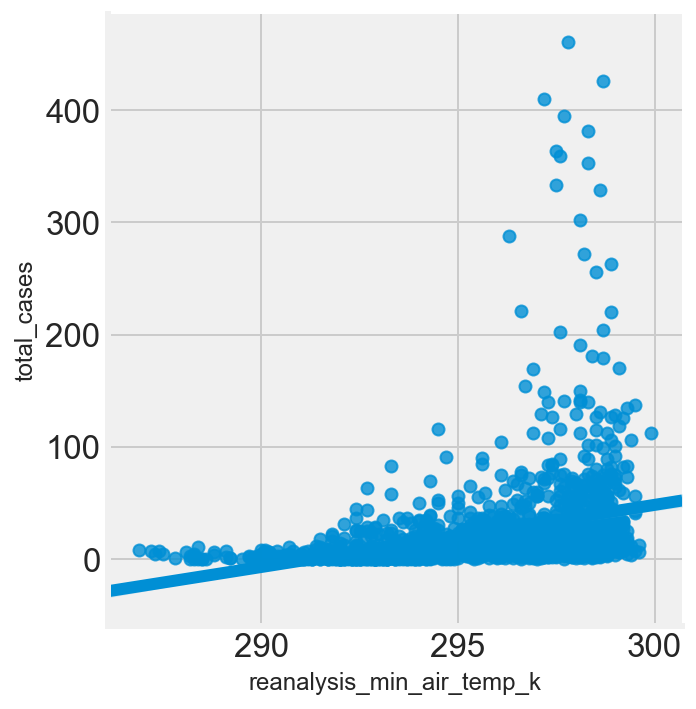

In [72]:
sns.lmplot('reanalysis_min_air_temp_k','total_cases',dengue_merged)

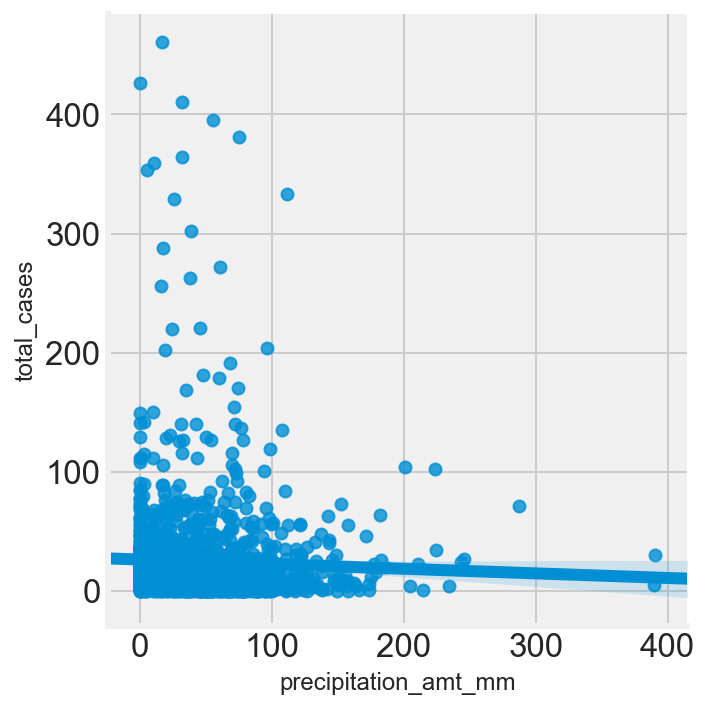

In [74]:
#Not much correlation between precipitation and total cases.
sns.lmplot('precipitation_amt_mm','total_cases',dengue_merged)

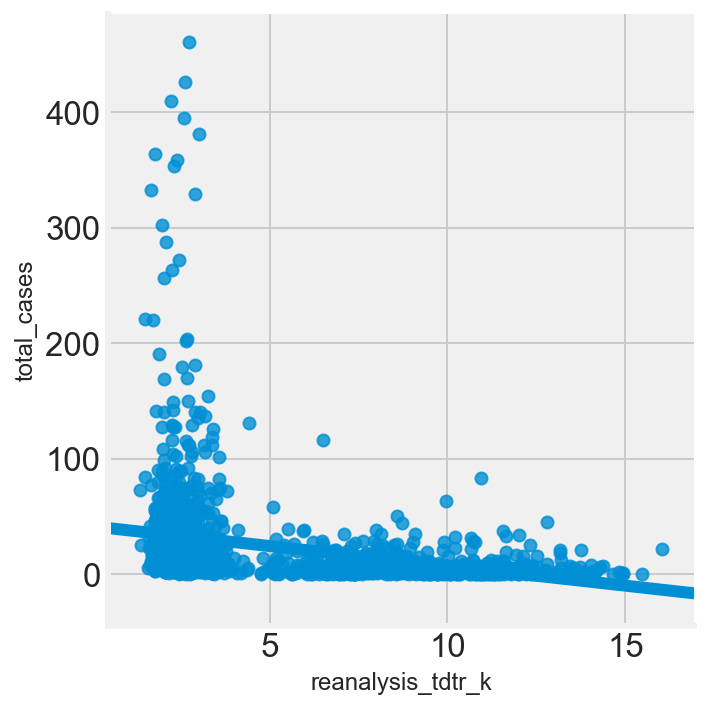

In [80]:
#nor any correlation between Diurnal temperature range and total cases.
sns.lmplot('reanalysis_tdtr_k','total_cases',dengue_merged)

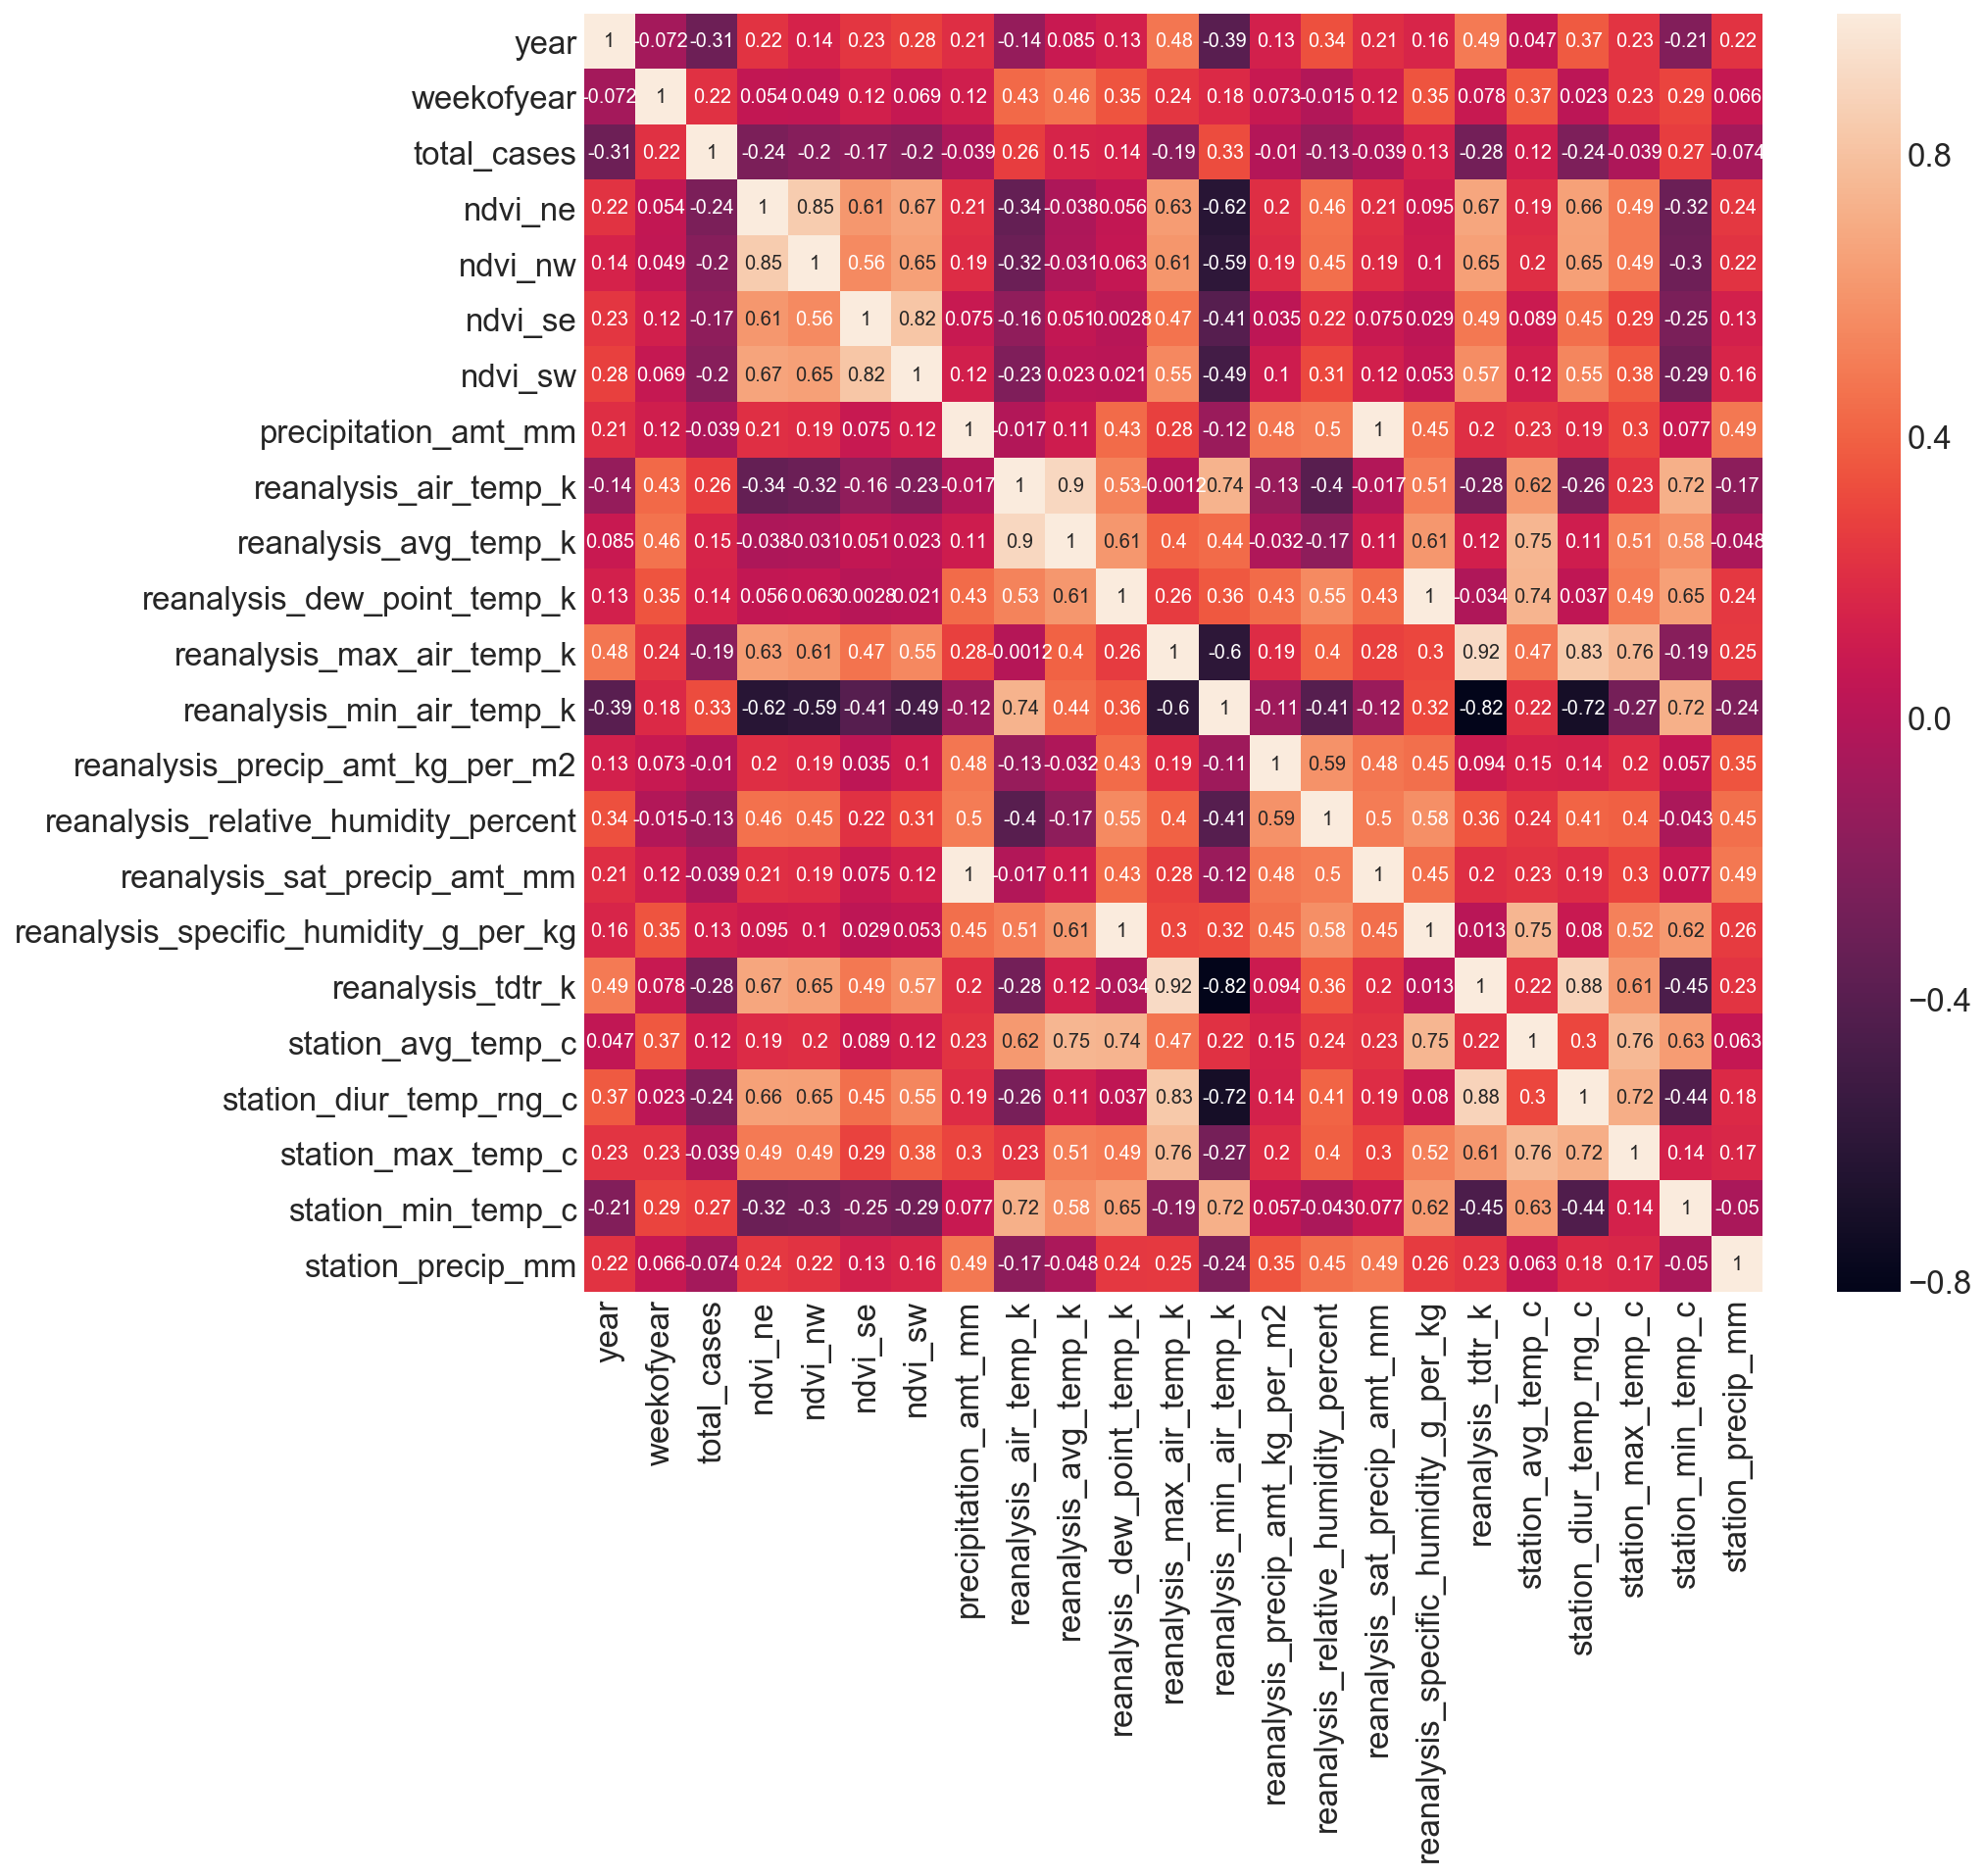

In [82]:
#both cities. Some 'over correlation' happening: humidity with dew, the 2 precipitation features.
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(dengue_merged.corr(),annot=True,ax=ax)
plt.show()

Observations from the EDA:

San Juan data set is more complete than the Iquitos one. San Juan is missing a lot of data on one particular features (NDVI_NE) but otherwise is quite complete. The Iquitos data is sometimes missing entire lines, which means it won't be as reliable for modelling. 

The spikes on the timelines are outbreaks. These will be important to predict but will also be the hardest to predict. 

There's an obvious annual cycle on the San Juan data. 34.18 cases/week is the baseline. Less cases happen between January to July. August to December have above average cases/week.

Iquitos has a less predictable annual cycle but this may be due to less accurate data collected. Iquitos is also deep in the Peruvian Amazon basin, and poorer than San Juan, so may rely on NGO infrastructure/logistics to better log the data. From the data collected the baseline is 8.86 cases/week. Less cases from March to September. Above average cases are from October to February. 

Initital thoughts are that rainfall is not a great predictor of dengue cases. The minimum temperature and humidity levels are seemingly more correlated with predicting dengue. 